# Аналитика данных интернет-магазина товаров для дома и быта «Пока все ещё тут»

## Описание проекта

Целью исследования является анализ пользовательского опыта в интернет-магазине товаров для дома и быта «Пока все ещё тут».

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшие задачи — расчёт метрик и создание гипотез на основе полученных данных.

«Пока все ещё тут» — мы создаём уют!

## Описание данных

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Путь к файлу: /datasets/ecom_dataset_upd.csv

Набор данных включает следующие поля:

* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара.

## Цели исследования

Выявление профилей потребления покупателей и их сегментация.

Цели проекта:

* провести исследовательский анализ данных;
* проанализировать торговый ассортимент;
* сегментировать покупателей на основе истории их покупок;
* сформулировать и проверить статистические гипотезы.

## План проекта

### Шаг 1. Загрузка данных

* Импортирование библиотек;
* Импортирование данных в датасет;
* Просмотр и анализ данных датасета;
* Вывод.

### Шаг 2. Предобработка данных

* Просмотр и обработка аномалий в данных;
* Добавление нужных столбцов;
* Вывод.

### Шаг 3. Исследовательский анализ данных

* Проведем категоризацию наименования товара;
* Составим рейтинг по самым продаваемым товарам в каждой категории по количеству заказов;
* Составим рейтинг по самым прибыльным товарам в каждой категории;
* Посмотрим сезонность товаров по категориям и проанализируем продажи категорий товаров по временам года;
* Посчитаем выручку и количество покупателей по категориям;
* Вывод.

### Шаг 4. Сегментация покупателей на основе истории их покупок

* Сделаем кластеризацию;
* Обучим модель кластеризации алгоритмом K-Means;
* Спрогнозируем сегменты покупателей;
* Выведем статистику по кластерам;
* Вывод.

### Шаг 5. Проверка статистических гипотез

1. Гипотеза. Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей отсутствует.

H1: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

2. Гипотеза. Статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем объёме продаж между сегментами отсутствует.

H1: Статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

3. Вывод.

### Общие выводы и рекомендации

### Презентация

## Шаг 1. Загрузка данных

In [1]:
# Импортируем библиотеки.

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import math as mth
from pymystem3 import Mystem
from collections import Counter
import os
import itertools
import plotly.express as px
import requests
import re
import datetime as dt
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from statsmodels.stats.multitest import multipletests
from matplotlib import gridspec
from scipy.stats import shapiro, levene

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импортируем данные в датасет.

try:
    ecom_online = pd.read_csv('/datasets/ecom_dataset_upd.csv', sep=',')
except:
    ecom_online = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv', sep=',')

In [3]:
# Проверяем и выводим данные.

def inspect(df):
    pd.set_option('display.float_format', '{:.2f}'.format)
    pd.options.display.max_colwidth = 120
    display(df.head(15)) 
    df.info()
    print ('Количество дубликатов -', df.duplicated().sum())
    print ('Количество пропусков:')
    print(df.isna().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
ecom_online = inspect(ecom_online)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
Количество дубликатов - 0
Количество пропусков:
date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


,date,order_id,quantity,price
count,7474.00,7474.00,7474.00,7474.00
mean,2018912614.03,49449.88,2.36,478.74
std,427887.84,32679.64,14.50,901.62
min,2018100100.00,12624.00,1.00,9.00
25%,2019021713.00,14833.00,1.00,97.00
50%,2019051409.00,68768.00,1.00,135.00
75%,2019063013.00,71257.75,1.00,439.00
max,2020013115.00,112789.00,1000.00,14917.00


1d6c8c1f-a799-4418-9af2-1ded47d7a85c    888
db77c238-3c80-4032-9e3c-c30a43f4a650    203
c971fb21-d54c-4134-938f-16b62ee86d3b    144
3d5fef90-4a65-4a7e-84cf-010eba7b038d     90
42d3cb27-6519-4627-9b4a-5aa8ee600203     63
                                       ... 
eb8a6adb-9211-4973-97c4-85f4f2695363      1
21b4642e-9cdf-4738-a290-b42d3e748c0f      1
43cd72d6-40ff-49e7-bcb2-79e3a176c48f      1
e43ca8b0-1ca5-4ab5-a77f-5038dfcd6d59      1
96c574af-cb6e-4e5c-8b67-07c46115a7c2      1
Name: customer_id, Length: 2451, dtype: int64

**************************************************


Рассада Кабачка сорт Зебра кассета 6 шт E6                                    79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                                78
Рассада Кабачка сорт Белогор кассета 6 шт E6                                  77
Пеларгония розебудная Red Pandora укорененный черенок                         77
Рассада Кабачка сорт Аэронавт, кассета по 6шт                                 76
                                                                              ..
Коврик для ванной комнаты FOCUS акрил 90х60 см зеленый, Spirella, 1014213      1
Термостакан WEBBER ВЕ-6031 ЧАЙ 450 мл                                          1
Вешалка-плечики 3 шт без эссенции цвет светло-бирюзовый FWM-002/Aruba blue     1
Фаленопсис королевский Голубой 1 ствол d-12 см                                 1
Рассада томата (помидор) сорт Золотое руно, кассета по 6шт                     1
Name: product, Length: 2343, dtype: int64

**************************************************


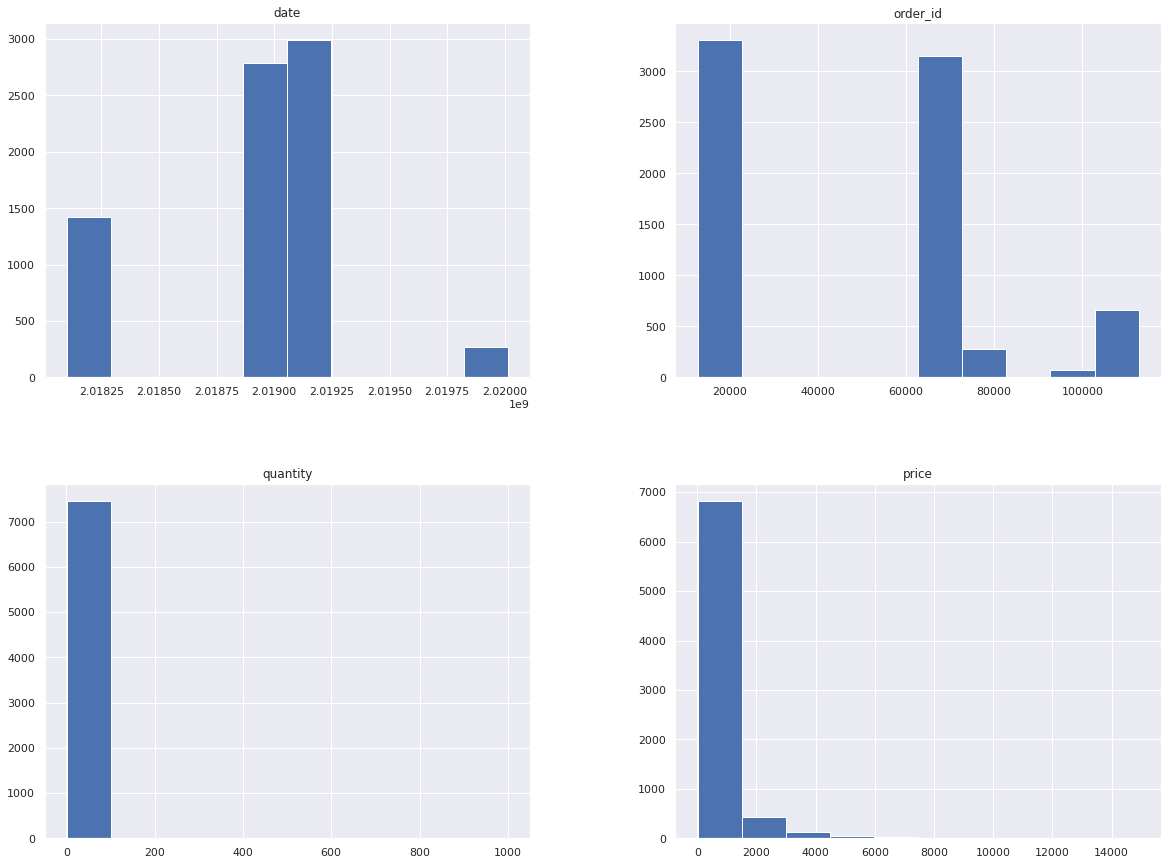

In [4]:
# Для наглядности построим гистограммы по некоторым данным

ecom_online.hist(figsize=(20, 15));

**Вывод:**

В датасете ecom_online присутствует 6 столбцов, и он состоит из 7474 наблюдений. Вес 350.5+ KB.

Дубликаты и пропуски отсутствуют. Названия столбцов в датаcете уже приведены к нижнему регистру и нужному формату.

Нужно будет заменит типы данных для столбца date. Также, нужно будет проверить датасет на неявные дубликаты.

## Шаг 2. Предобработка данных

In [5]:
# Приведем столбцы с датой в нужный формат.

ecom_online['date'] = pd.to_datetime(ecom_online['date'], format='%Y%m%d%H')

In [6]:
# Проверим, за какой период предоставлены данные.

ecom_online['date'].dt.year.unique()

array([2018, 2019, 2020])

Данные предоставлены за 2018, 2019 и 2020 года.

In [7]:
# Проверим минимальные и максимальные даты.

print(min(ecom_online['date']))
print(max(ecom_online['date']))

2018-10-01 00:00:00
2020-01-31 15:00:00


Данные в датасете даются от 01.10.2018 по 31.01.2020.

**Создадим отдельно колонки с месяцем и годом**

In [8]:
ecom_online['year_month'] = pd.to_datetime(ecom_online['date']).dt.strftime('%Y-%m')
ecom_online['month'] = pd.to_datetime(ecom_online['date']).dt.strftime('%m')
ecom_online['year'] = pd.to_datetime(ecom_online['date']).dt.strftime('%Y')

In [9]:
# Проверим.

ecom_online.head()

,date,customer_id,order_id,product,quantity,price,year_month,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,2018-10,10,2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10,10,2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10,10,2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10,10,2018


**Проверим наличие неявных дубликатов**

In [10]:
duplicates_all = ecom_online.duplicated().sum()
duplicates = len(ecom_online
                 [ecom_online[
                     ['product', 
                      'customer_id', 
                      'order_id']].duplicated() == True][['product', 'order_id']])

print('Количество дубликатов: {}'.format(duplicates_all))
print('Количество неявных дубликатов: {}'.format(duplicates))
print('Доля дубликатов от общего количества: {:.2%}'.format((duplicates_all + duplicates)/len(ecom_online))) 

Количество дубликатов: 0
Количество неявных дубликатов: 1886
Доля дубликатов от общего количества: 25.23%


1886 неявных дубликатов - это скорее всего и есть то задвоение заказов о которых предупреждали, когда из интернета и из системы идет один и тот же заказ. Поэтому, предлагаю удалить задвоение.

In [11]:
# Удаляем дубликаты.

ecom_online = ecom_online.drop_duplicates(subset=['order_id', 'product'], keep='last').reset_index()

In [12]:
# Проверим.

ecom_online[['customer_id', 'order_id', 'product']].duplicated().sum()

0

In [13]:
# Посмотрим заказы, в которых есть разные даты.

dates = ecom_online.groupby('order_id').agg({'date':'nunique'}).sort_values(by='date', ascending=False).query('date > 1')
print('Заказы, в которых несколько разных дат: {}'.format(len(dates)))

Заказы, в которых несколько разных дат: 16


Очень похоже на какие-то сбои при заказе, либо ошибку в записи данных. Поэтому, предлагаю также избавиться от таких заказов.

In [14]:
# Выделим их.

list_dates = list(dates.index)

In [15]:
# Удалим.

ecom_online = ecom_online.drop(ecom_online[ecom_online['order_id'].isin(list_dates)].index)

In [16]:
# В датасете есть один заказ на 1000 штук. Предлагаю посмотреть его.

ecom_online[ecom_online['quantity']==1000]

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year
3782,5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.00,2019-06,06,2019


In [17]:
# Проверим, покупал ли этот id еще что-то.

ecom_online[ecom_online['customer_id']=='312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6']

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year
3782,5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.00,2019-06,06,2019


Скорее всего, это какой-то тестовый заказ для проверки системы. Он такой один и клиент под таким id больше не совершал покупок. Поэтому, предлагаю это наблюдение удалить.

In [18]:
# Удаляем.

ecom_online = ecom_online.drop(ecom_online[ecom_online['customer_id'] == '312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6'].index)

In [19]:
# Проверим удаление.

ecom_online[ecom_online['customer_id']=='312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6']

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year


In [20]:
# Подсчитаем количество заказов по покупателелям.

orders_per_customer = ecom_online.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})
orders_per_customer.columns = ['customer_id', 'orders']

In [21]:
# Посчитаем 95-й и 99-й выборочные перцентили количества заказов по покупателелям.

percentiles = np.percentile(orders_per_customer['orders'], [95, 99])
print('95-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[0]))
print('99-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[1]))

95-й перцентиль количества заказов на покупателя: 2.0 заказа
99-й перцентиль количества заказов на покупателя: 3.0 заказа


In [22]:
# Посмотрим аномальных пользователей.

anomaly_customers = pd.concat([orders_per_customer[orders_per_customer['orders']>3]['customer_id']], axis = 0)
print('Всего аномальных покупателей: {} покупателей'.format(len(anomaly_customers)))

Всего аномальных покупателей: 8 покупателей


In [23]:
# Отсеим аномальных пользователей.

ecom_online = ecom_online.query('customer_id not in @anomaly_customers')

# Посчитаем общее кол-во покупателей. 

customers = len(ecom_online['customer_id'].unique())
print("Всего покупателей за все время после отсеивания: {} покупателей".format(customers))

Всего покупателей за все время после отсеивания: 2407 покупателей


In [24]:
# Проверим датасет.

ecom_online.shape

(5192, 10)

In [25]:
# Добавим столбец с выручкой по заказам.

ecom_online['revenue'] = ecom_online['quantity'] * ecom_online['price']

In [26]:
# Проверим.

ecom_online.head(20)

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year,revenue
0,0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10,10,2018,142.00
1,1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,2018-10,10,2018,194.00
2,2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10,10,2018,112.00
3,3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10,10,2018,179.00
4,4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10,10,2018,112.00
5,5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00,2018-10,10,2018,164.00
6,6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00,2018-10,10,2018,134.00
7,7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00,2018-10,10,2018,824.00
8,8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00,2018-10,10,2018,269.00
10,10,2018-10-01 11:00:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.00,2018-10,10,2018,820.00


**Вывод**

Привели столбец с датой в нужный формат. Проверили, за какой период предоставлены данные - данные предоставлены с 2018-10-01 00:00:00 по 2020-01-31 15:00:00.

При выявлении 1886 неявных дубликатов - удалили их, так как это скорее всего и есть то задвоение заказов о которых предупреждали, когда из интернета и из системы идет один и тот же заказ.

Удалили заказы, в которых есть разные даты, так как это похоже на сбои при заказе, либо ошибку в записи данных и тестовый заказ для проверки системы на 1000 единиц одного наименования товара.

Удалили заказы, в которых несколько разных дат и воспользовались 99м перцентилем, чтобы отсечь аномальных клиентов.

Отдельно создали колонки с месяцем и годом. Также добавлен столбец с выручкой по заказам.

## Шаг 3. Исследовательский анализ данных

**Проведем категоризацию наименования товара**

In [27]:
# Посмотрим уникальные значения и выведем леммы.

m = Mystem()
unique_product = ecom_online['product'].unique()
lemmas = []
for i in unique_product:
    result = ''.join(m.lemmatize(i)).strip()
    lemmas.append(result)
lemmas

['комнатный растение в горшок алый вера, d12, h30',
 'комнатный растение в горшок кофе арабика, d12, h25',
 'радермахер d-12 см h-20 см',
 'хризолидокарпус лутесценс d-9 см',
 'циперус зумула d-12 см h-25 см',
 'шеффлер лузеан d-9 см',
 'юкка нитчатый d-12 см h-25-35 см',
 'настенный сушилка для белье Gimi Brio Super 100',
 'таз пластмассовый 21,0 л круглый "водолей" С614, 1404056',
 'вешалка для брюки металлический с резиновый покрытие 26 см цвет: синий, Attribute, AHS331',
 'сушилка для белье потолочный Zalger Lift Basic 1520 200 см, 10 м',
 'крючок одежный 2-х рожковый серый металлик с полимерный покрытие *тонар*, 1110027',
 'корзина мягкий пластиковый 17 л, м-пластика, M2880',
 'многолетний растение тимьян-чабрец розовый объем 0,5 л',
 'рассада зелень для кухня базилик тонус, кассета по 6шт',
 'рассада зелень для кухня мелисса в горшок диам. 9 см',
 'муляж "райский яблочко зеленый" 2 шт полиуретан, d 3 см',
 'муляж банан, желтый, 21 см, полиуретан, Fancy Fair/ff XJ210',
 'муляж вин

In [28]:
# Выведем популярные направления для товаров.

text = m.lemmatize(' '.join(lemmas))
Counter(text)

Counter({'комнатный': 26,
         ' ': 16887,
         'растение': 29,
         'в': 263,
         'горшок': 128,
         'алый': 2,
         'вера': 2,
         ', ': 999,
         'd12': 3,
         'h30': 6,
         'кофе': 5,
         'арабика': 4,
         'h25': 1,
         'радермахер': 1,
         'd': 240,
         '-': 919,
         '12': 147,
         'см': 1015,
         'h': 58,
         '20': 70,
         'хризолидокарпус': 1,
         'лутесценс': 1,
         '9': 121,
         'циперус': 1,
         'зумул': 1,
         '25': 40,
         'шеффлер': 2,
         'лузеан': 1,
         'юкка': 1,
         'нитчатый': 1,
         '35': 7,
         'настенный': 30,
         'сушилка': 115,
         'для': 521,
         'белье': 139,
         'Gimi': 57,
         'Brio': 4,
         'Super': 6,
         '100': 53,
         'таз': 30,
         'пластмассовый': 52,
         '21': 20,
         ',': 281,
         '0': 158,
         'л': 239,
         'круглый': 20,
         ' 

In [29]:
# Создадим дополнительный столбец с леммами.

lem = []
for i in ecom_online['product']:
    result = ''.join(m.lemmatize(i)).strip()
    lem.append(result)
ecom_online['lem'] = lem
ecom_online.head(10)

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year,revenue,lem
0,0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10,10,2018,142.00,"комнатный растение в горшок алый вера, d12, h30"
1,1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,2018-10,10,2018,194.00,"комнатный растение в горшок кофе арабика, d12, h25"
2,2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10,10,2018,112.00,радермахер d-12 см h-20 см
3,3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10,10,2018,179.00,хризолидокарпус лутесценс d-9 см
4,4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10,10,2018,112.00,циперус зумула d-12 см h-25 см
5,5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00,2018-10,10,2018,164.00,шеффлер лузеан d-9 см
6,6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00,2018-10,10,2018,134.00,юкка нитчатый d-12 см h-25-35 см
7,7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00,2018-10,10,2018,824.00,настенный сушилка для белье Gimi Brio Super 100
8,8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00,2018-10,10,2018,269.00,"таз пластмассовый 21,0 л круглый ""водолей"" С614, 1404056"
10,10,2018-10-01 11:00:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.00,2018-10,10,2018,820.00,"вешалка для брюки металлический с резиновый покрытие 26 см цвет: синий, Attribute, AHS331"


In [30]:
# Создадим словарь с категориями и списком слов.

kitchen = ['антижир', 'банка', 'бидон', 'блюдо', 'блюдце', 'бокал', 'бульонница', 'бутылка', 'бутылочный', 'венчик',
                 'вилка', 'выпечка', 'герметичный', 'губка', 'измельчитель', 'картофелемялка', 'кастрюля', 'кекс',
                 'кипятильник', 'кондитерский', 'кружка', 'крышка', 'кухонный', 'лопатка', 'ложка', 'мантоварка',
                 'мантоварка-пароварка', 'миксер', 'мини-сковорода', 'миска', 'мука', 'нож', 'ножеточка', 'овощеварка',
                 'овощечистка', 'орехоколка', 'отделитель', 'плита', 'половник', 'посуда', 'посудомоечный',
                 'пресс', 'продукт', 'противень', 'разделочный', 'рыбочистка', 'салатник', 'салфетница', 'сахарница', 'свч',
                 'сито', 'скалка', 'скатерть', 'сковорода', 'соковарка', 'соковыжималка', 'сотейник', 'стакан', 'столовый',
                 'тарелка', 'терка', 'термокружок', 'термос', 'термостакан', 'толкушка', 'тортница', 'фужер', 'хлебница',
                 'чайник', 'чайный', 'электроштопор', 'яйцо']


house = ['d-', 'd-5', 'd-7', 'd-9', 'D10', 'd-10', 'd-11', 'D12', 'D12,', 'd12', 'd-12', 'd-13', 'd-14', 'd-15',
                  'd-17', 'd-18', 'd-19', 'd-20', 'd-21', 'D23', 'd-23', 'бак', 'ванна', 'ванная', 'ванный', 'вантуз', 'ваза',
                  'ведро', 'весы', 'вешалка', 'вешалка-перекладина', 'вешалка-плечики', 'вешалка-стойка', 'вешалка-сушилка',
                  'вещь', 'гладильный', 'глажение', 'засор', 'зубной', 'известковый', 'искусственный', 'искуственный', 'калла',
                  'ключница', 'ковер', 'коврик', 'ковш', 'комнатный', 'кондиционер', 'корзина', 'коробка', 'кофр', 'крючок',
                  'лавр', 'лоток', 'мыло', 'мыло-скраб', 'муляж', 'наволочка', 'наматрацник', 'наматрицник-чехол',
                  'наматрасник', 'насадка', 'насадка-моп', 'одеяло', 'окномойка', 'отбеливатель', 'перчатка', 'плед', 'плечики',
                  'подголовник', 'пододеяльник', 'подрукавник', 'подушка', 'покрывало', 'пол', 'полимербыт', 'полировка',
                  'полотенце', 'постельный', 'прищепок', 'простыня', 'пыль', 'пятно', 'радиаторный', 'ролик', 'салфетка',
                  'сантехника', 'светильник', 'скребок', 'совок', 'стиральный', 'стирка', 'сушилка', 'таз', 'ткань', 'тряпка',
                  'тряпкодержатель', 'туалет', 'туалетный', 'увлажнять', 'унитаз', 'унитазный', 'утюг', 'фен', 'фоторамка',
                  'халат', 'хранение', 'цикламен,', 'чехол', 'швабра', 'щетка', 'щетка-утюжок', 'шило', 'штора', 'ручка']

tools = ['болт', 'вентиляционный', 'инструмент', 'карниз', 'комод', 'крепеж', 'лестница-стремянка', 'линейка', 'линейка,',
             'мебельный', 'напильник', 'обувница-3', 'петля', 'петля-стрела', 'подставка', 'полк', 'полка', 'пробка', 'пуф',
             'сварка', 'сверло', 'сверло-фреза,', 'свереть', 'стеллаж', 'стремянка', 'стремянка-табурет', 'строительный',
             'уголок', 'угольник', 'угольник,', 'фиксатор-шар', 'форточный', 'шпингалет', 'штангенциркуль', 'этажерка']

garden = ['автополив', 'аквилегия', 'алиссум', 'анемон', 'антуриум', 'арбуз', 'астра', 'бадан', 'бакоп', 'барвинок', 'бегония',
         'бензин', 'бузульник', 'веник', 'вербейник', 'вербена', 'веревка', 'виола', 'г', 'гайлардий', 'гвоздик', 'георгин',
         'гипсофил', 'гортензия', 'девичий', 'дендробиум', 'дыня', 'ель', 'зола', 'календула', 'калибрахоа', 'камнеломка',
         'кассета', 'кашпо', 'кипарисовик', 'клен', 'клубника', 'колокольчик', 'колосковый', 'кореопсис', 'корыто', 'косметь',
         'котовник', 'лапчатка', 'лен', 'лилейник', 'лобелия', 'многолетний', 'монарда', 'мусор', 'мусорный', 'настурция',
         'нивянник', 'осина', 'папоротник', 'пеларгония', 'петуния', 'пикник', 'пиретрум', 'платикодон', 'почтовый',
         'пьезозажигалка', 'ранункулус', 'рассада', 'роза', 'рудбекия', 'садовый', 'седум', 'солидаго', 'сумка-тележка',
         'тележка', 'томат', 'тюльпан', 'уличный', 'урна', 'урна-пепельница', 'фал', 'физостегия', 'флокс', 'фуксия', 'хоста',
         'хозяйственный', 'хризантема', 'цинния', 'черенок', 'шнур', 'шпагат', 'щетка-сметка', 'энотера', 'эхинацея', 'ясколка', 'овсянница']

other = ['']

In [31]:
# Определим категории в словаре по ключевым словам.

def category(lem):
    for item in kitchen:
        if item in lem:
            return 'Товары для кухни'
    for item in house:
        if item in lem:
            return 'Товары для дома'

    for item in tools:
        if item in lem:
            return 'Инструменты'

    for item in garden:
        if item in lem:
            return 'Товары для сада'

    for item in other:
        if item in lem:
            return 'Другое'

In [32]:
# Проверим, всем ли товарам присвоена категория.

ecom_online['category_list'] = ecom_online['lem'].apply(category)
len(ecom_online.query('category_list == "нет категории"'))

0

Категория присвоена всем товарам.

In [33]:
# Посмотрим статистику по категориям.
statistics = ecom_online.groupby('category_list').agg({'product':'count'}).reset_index()
statistics.columns = ['category_list', 'products']
statistics['proportion'] = ((statistics['products'] / len(ecom_online))*100).round(1).astype('str')+'%'
display(statistics.sort_values(by='products', ascending = False))

,category_list,products,proportion
1,Товары для дома,2388,46.0%
3,Товары для сада,2201,42.4%
2,Товары для кухни,507,9.8%
0,Инструменты,96,1.8%


Больше всего товаров для дома и сада (46% и 42,4% соответственно). На третьем месте товары для кухни, их всего 9,8%. Инструменты включают в себя 1,8% товаров.

**Составим рейтинг по самым продаваемым товарам в каждой категории по количеству заказов**

In [34]:
# Выведем рейтинг из пяти самых продаваемых товаров в каждой категории по количеству заказов.

top5_prod_by_orders = ecom_online.groupby('product')\
                           .agg({'category_list':'first',
                                 'order_id':'nunique',
                                 'customer_id':'nunique',
                                 'quantity':'sum',
                                 'revenue':'sum'})\
                           .reset_index().sort_values(by='order_id', ascending=False)
top5_prod_by_orders.columns = ['product', 'category_list', 'orders', 'customers', 'quantity', 'revenue']

for category in top5_prod_by_orders['category_list'].unique():
    print()
    print('Рейтинг самых продаваемых товаров в каждой категории по количеству заказов: {}'.format(category))
    display(top5_prod_by_orders[top5_prod_by_orders['category_list']==category].head(5))
    print();


Рейтинг самых продаваемых товаров в каждой категории по количеству заказов: Товары для сада


,product,category_list,orders,customers,quantity,revenue
996,Пеларгония розебудная Red Pandora укорененный черенок,Товары для сада,63,61,79,10659.33
994,Пеларгония розебудная Prins Nikolai укорененный черенок,Товары для сада,54,51,61,8222.50
1547,Сумка-тележка 2-х колесная Gimi Argo синяя,Товары для сада,44,41,44,47258.00
993,Пеларгония розебудная Mary укорененный черенок,Товары для сада,38,34,46,6200.50
995,Пеларгония розебудная Queen Ingrid укорененный черенок,Товары для сада,31,29,39,5314.33




Рейтинг самых продаваемых товаров в каждой категории по количеству заказов: Товары для дома


,product,category_list,orders,customers,quantity,revenue
971,Пеларгония зональная диам. 12 см сиреневый полумахровый,Товары для дома,50,46,57,9633.00
949,Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок,Товары для дома,25,24,28,2072.00
952,Пеларгония зональная диам. 12 см коралловая полумахровая,Товары для дома,24,23,27,4658.00
973,Пеларгония зональная диам. 12 см темнорозовая полумахровая,Товары для дома,22,22,26,4413.00
997,Пеларгония розебудная Rosebud Red d-7 см,Товары для дома,18,18,23,3105.00




Рейтинг самых продаваемых товаров в каждой категории по количеству заказов: Товары для кухни


,product,category_list,orders,customers,quantity,revenue
1832,Термокружка Яромир КРЕМЛЬ ЯР-2406М 400 мл,Товары для кухни,5,5,5,1603.00
896,"Овощеварка алюминиевая Scovo МТ-045, Хозлэнд, 1502079",Товары для кухни,5,5,5,2245.00
658,"Кувшин пластмассовый с крышкой ""Кумган"" 2,0 л 1408003",Товары для кухни,5,5,5,745.00
1409,Салатник Luminarc ЭМПИЛАБЛЬ ВЕЛАДА 17 см L7997,Товары для кухни,5,5,5,820.00
1450,Скатерть Dasch Донна Роза из ПВХ 0401-2 Розы круглая 152 см 5974,Товары для кухни,5,5,6,2652.00




Рейтинг самых продаваемых товаров в каждой категории по количеству заказов: Инструменты


,product,category_list,orders,customers,quantity,revenue
1540,"Стяжка оконная с болтом СТ-55 цинк, 1108354",Инструменты,5,4,37,748.33
1097,Подставка для обуви резиновая Attribute 80x40 см AMC080,Инструменты,4,4,4,1416.00
564,Комод Эльфпласт № 3 Алфавит оранжевый 301о,Инструменты,3,2,3,4047.00
1538,Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646,Инструменты,3,2,3,8997.00
686,"Линейка, длина 30 см, Truper, RGL-30/14387",Инструменты,3,3,3,741.00


Тут видно, что если смотреть на категорию Товары для сада, то в лидерах продаж идет Пеларгония розебудная Red Pandora укорененный черенок - 63 заказа с выручкой 10659.33 у.е. Зато, на третьем месте Сумка-тележка 2-х колесная Gimi Argo синяя - 44 заказа, но выручка по ней больше - 47258.00 у.е.

В категории Товары для дома можно видеть, что самое продаваемое наименование - Пеларгония зональная диам. 12 см сиреневый полумахровый. 50 заказов с выручкой 9633.00 у.е.

В категории Товары для кухни можно увидеть, что на все 5 товаров рейтинга сделано по 5 заказов. Больше всего выручка у Скатерть Dasch Донна Роза из ПВХ 0401-2 Розы круглая 152 см 5974, потому что в каком-то из заказов было заказано 2шт., так как общее количество по 5 заказам - 6шт. Поэтому , эта позиция лидирует по выручке 2652.00 у.е. Но, Овощеварка алюминиевая Scovo МТ-045, Хозлэнд, 1502079 не сильно отстает - 2245.00 у.е.

И в категории Инструменты на первом месте по количеству продаж идет Стяжка оконная с болтом СТ-55 цинк, 1108354 - 5 заказов, выручка составила 748.33 у.е. Но, если смотреть по выручке, то здесь лидирует Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646 - 8997.00 у.е. всего с 3 заказами.

**Составим рейтинг по самым прибыльным товарам в каждой категории**

In [35]:
# Выведем рейтинг из пяти самых прибыльных товаров в каждой категории.

top5_prod_by_revenue = ecom_online.groupby('product')\
                           .agg({'category_list':'first',
                                 'order_id':'nunique',
                                 'customer_id':'nunique',
                                 'quantity':'sum',
                                 'revenue':'sum'})\
                           .reset_index().sort_values(by='revenue', ascending=False)
top5_prod_by_orders.columns = ['product', 'category_list', 'orders', 'customers', 'quantity', 'revenue']

for category in top5_prod_by_revenue['category_list'].unique():
    print()
    print('Рейтинг самых прибыльных товаров в каждой категории: {}'.format(category))
    display(top5_prod_by_revenue[top5_prod_by_revenue['category_list']==category].head(5))
    print();


Рейтинг самых прибыльных товаров в каждой категории: Товары для дома


,product,category_list,order_id,customer_id,quantity,revenue
1144,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,Товары для дома,2,1,30,53232.00
187,Вешалки мягкие для деликатных вещей 3 шт шоколад,Товары для дома,2,2,335,49596.00
801,Муляж ЯБЛОКО 9 см красное,Товары для дома,6,6,618,32702.00
1628,Сушилка Meliconi Stendy Junior,Товары для дома,4,4,4,22376.00
257,Гладильная доска Sarayli New Elegant 125x45 см,Товары для дома,7,6,7,17843.00




Рейтинг самых прибыльных товаров в каждой категории: Товары для сада


,product,category_list,order_id,customer_id,quantity,revenue
1547,Сумка-тележка 2-х колесная Gimi Argo синяя,Товары для сада,44,41,44,47258.00
1816,Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,Товары для сада,3,3,59,33992.00
807,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,Товары для сада,3,3,5,27560.00
1866,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",Товары для сада,1,1,5,24370.00
1600,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,Товары для сада,2,2,3,23037.00




Рейтинг самых прибыльных товаров в каждой категории: Товары для кухни


,product,category_list,order_id,customer_id,quantity,revenue
839,Набор ножей Attribute CHEF 5 предметов AKF522,Товары для кухни,1,1,64,29248.00
1467,Скатерть круглая d-175 см 50% полиэстер 50% хлопок белая Wellness MLd-187-Эстель*01,Товары для кухни,1,1,10,11400.00
1444,Скатерть 180 см WELLNESS WTd180-Лион*01 100% полиэстер,Товары для кухни,1,1,8,8832.00
1462,Скатерть Рим 88% полиэфир 12% хлопок прямоугольная 350х150 см голубая Wellness MC355-Рим*16,Товары для кухни,1,1,4,7496.00
731,"Модульная стеклянная банка 1,1л, 298264, Brabantia,",Товары для кухни,2,2,8,6600.00




Рейтинг самых прибыльных товаров в каждой категории: Инструменты


,product,category_list,order_id,customer_id,quantity,revenue
1538,Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646,Инструменты,3,2,3,8997.00
1537,Стремянки Colombo Leonardo 2 ступени G300A02W белая 4096,Инструменты,2,2,2,7424.00
1519,Стремянка COLOMBO FACTOTUM 4 ступени алюминий G110AT4W,Инструменты,2,1,2,6898.00
1531,Стремянка бытовая Framar Slimmy 4 ступени,Инструменты,2,2,3,5622.00
1527,Стремянка Scab Balzo 762 5 ступеней алюминиевая 3885,Инструменты,1,1,1,5549.00


По категории Товары для дома, самым прибыльным является Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок - 53232.00 у.е.

В категории Товары для сада, самым прибыльным является Сумка-тележка 2-х колесная Gimi Argo синяя - 47258.00 у.е.

В категории Товары для кухни, самым прибыльным является Набор ножей Attribute CHEF 5 предметов AKF522 - 29248.00 у.е.

В категории Инструменты, самым прибыльным является Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646 - 8997.00 у.е.

**Посмотрим сезонность товаров по категориям и проанализируем продажи категорий товаров по временам года**

In [36]:
ecom_online.head()

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year,revenue,lem,category_list
0,0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10,10,2018,142.00,"комнатный растение в горшок алый вера, d12, h30",Товары для дома
1,1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,2018-10,10,2018,194.00,"комнатный растение в горшок кофе арабика, d12, h25",Товары для дома
2,2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10,10,2018,112.00,радермахер d-12 см h-20 см,Товары для дома
3,3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10,10,2018,179.00,хризолидокарпус лутесценс d-9 см,Товары для дома
4,4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10,10,2018,112.00,циперус зумула d-12 см h-25 см,Товары для дома


In [37]:
# Создадим функцию и пропишем в ней номера месяцев по временам года.

def season_category(month):
    if month >= '03' and month <='05':
        return 'весна'
    elif month >= '06' and month <= '08':
        return 'лето'
    elif month >= '09' and month <= '11':
        return 'осень'
    else:
        return 'зима'

In [38]:
# Создадим отдельный столбец для времени года.

ecom_online['season_category'] = ecom_online['month'].apply(season_category)
ecom_online.sample(20)

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year,revenue,lem,category_list,season_category
4827,6747,2019-11-01 22:00:00,cf971740-da80-41a6-acfb-ef934cede4b4,108976,Муляж Вишня 3 см 10 шт полиуретан,2,74.00,2019-11,11,2019,148.00,муляж вишня 3 см 10 шт полиуретан,Товары для дома,осень
3415,4021,2019-05-24 13:00:00,118a08f4-ae51-4fc0-9634-639d73deaf08,71509,Сумка-тележка 2-х колесная складная Gimi Flexi серая,1,1649.00,2019-05,05,2019,1649.00,сумка-тележка 2-х колесный складной Gimi Flexi серый,Товары для сада,весна
1222,1432,2019-01-03 13:00:00,bad7f5f6-52cc-42cf-924c-5d3f82a249ed,69697,Вешалка настенная НИКА ВП6с с полкой 6 крючков серебро,1,389.00,2019-01,01,2019,389.00,вешалка настенный ника ВП6с с полка 6 крючок серебро,Товары для дома,зима
1736,2043,2019-02-26 21:00:00,e678ffd3-f88c-4d15-a5b1-aa2c307ce112,70478,Кухонное полотенце вафельное 64х38 см WELLNESS ЭЛИЯ-mix,1,104.00,2019-02,02,2019,104.00,кухонный полотенце вафельный 64х38 см WELLNESS элий-mix,Товары для кухни,зима
927,1064,2018-12-02 23:00:00,764d269d-c069-4835-b5be-d95efccf2e59,69179,Банка стеклянная с крышкой Attribute FLEUR 1350 мл ABF100G,6,194.00,2018-12,12,2018,1164.00,банка стеклянный с крышка Attribute FLEUR 1350 мл ABF100G,Товары для кухни,зима
731,855,2018-11-18 15:00:00,8620fc44-c68c-44ed-b7bd-3c10ae9219cb,69039,"Сушилка для белья потолочная Лиана 2,4 м 1703011",1,734.00,2018-11,11,2018,734.00,"сушилка для белье потолочный лиана 2,4 м 1703011",Товары для дома,осень
553,649,2018-11-05 21:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68870,"Шнур резиновый для тележки 80 см, 1209001",1,37.00,2018-11,11,2018,37.00,"шнур резиновый для тележка 80 см, 1209001",Товары для сада,осень
242,267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150,38.00,2018-10,10,2018,5700.00,"пружина дверной 240 мм оцинковывать (д-19 мм) без крепление, 1107014",Товары для сада,осень
3879,5619,2019-07-01 20:00:00,713141d7-bbaf-4da9-b43d-f91bd51b423c,14882,Рассада зелени для кухни Мята Спэйниш диам. 9 см,1,120.00,2019-07,07,2019,120.00,рассада зелень для кухня мята спэйниш диам. 9 см,Товары для сада,лето
5180,7100,2019-12-20 11:00:00,cfc55c59-c16e-4f6b-bf9c-71dbd64c9a5a,105211,Пеларгония зональная простая цвет фуксии взрослое растение,1,150.00,2019-12,12,2019,150.00,пеларгония зональный простой цвет фуксия взрослый растение,Товары для сада,зима


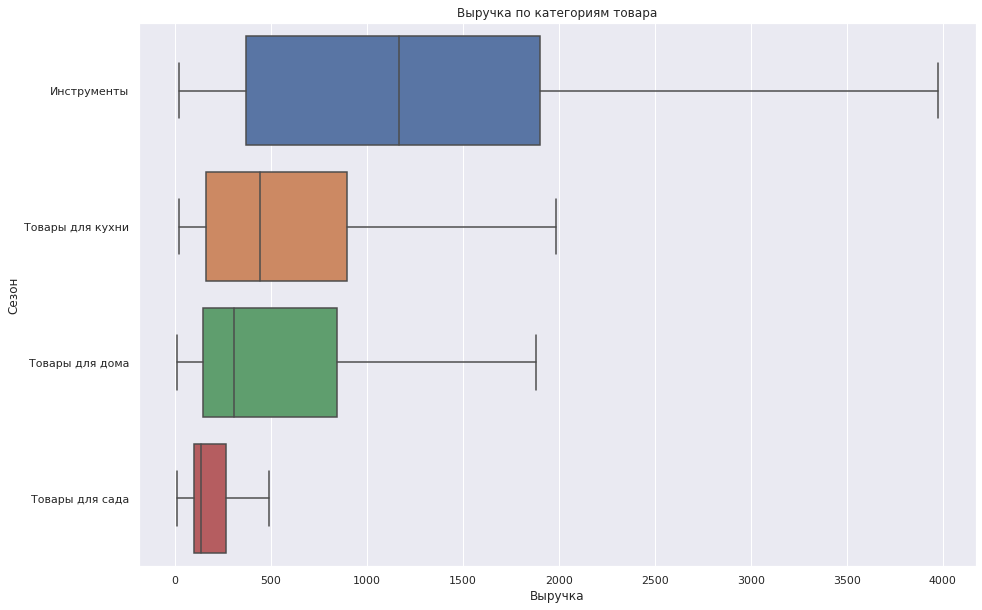

In [39]:
# Посмотрим выручку по категориям товара в медианных значениях.

category_list_rev = (ecom_online.groupby(['category_list'])['revenue'].median().sort_values(ascending=False))
plt.figure(figsize=(15,10))
sns.boxplot(x = 'revenue', 
            y = 'category_list', 
            data = ecom_online, 
            showfliers=False, 
            order=category_list_rev.index)
plt.title('Выручка по категориям товара')
plt.xlabel('Выручка')
plt.ylabel('Сезон')
plt.show();

Здесь в лидерах категория Инструменты. Затем, Товары для кухни и Товары для дома практически на одном уровне. Товары для кухни немного больше по выручке. Замыкает рейтинг категория Товары для сада.

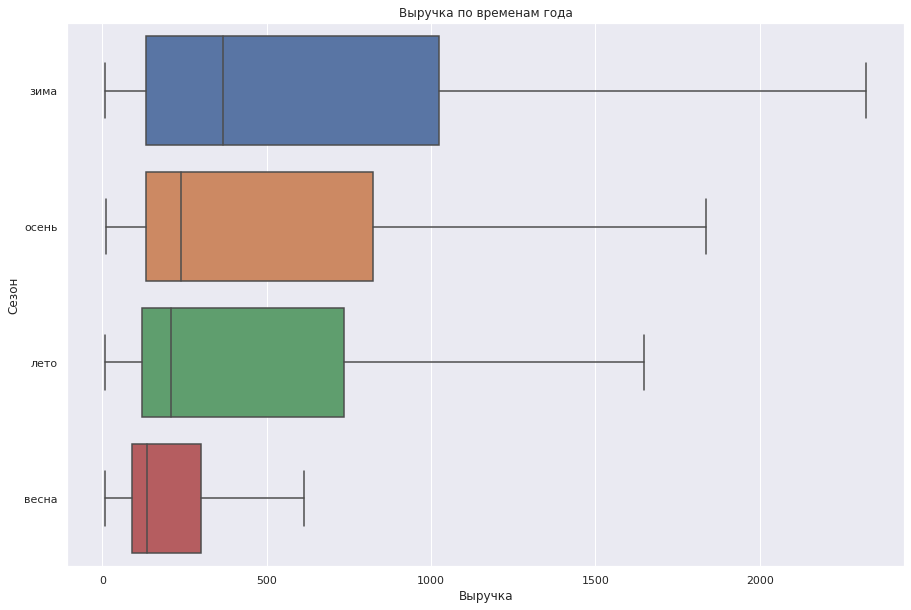

In [40]:
# Посмотрим выручку по временам года в медианных значениях.

season_category_rev = (ecom_online.groupby(['season_category'])['revenue'].median().sort_values(ascending=False))
plt.figure(figsize=(15,10))
sns.boxplot(x = 'revenue', 
            y = 'season_category', 
            data = ecom_online, 
            showfliers=False, 
            order=season_category_rev.index)
plt.title('Выручка по временам года')
plt.xlabel('Выручка')
plt.ylabel('Сезон')
plt.show();

Видно, что на зиму приходится больше всего выручки. Чуть меньше на осень и лето. Весной этот показатель небольшой.

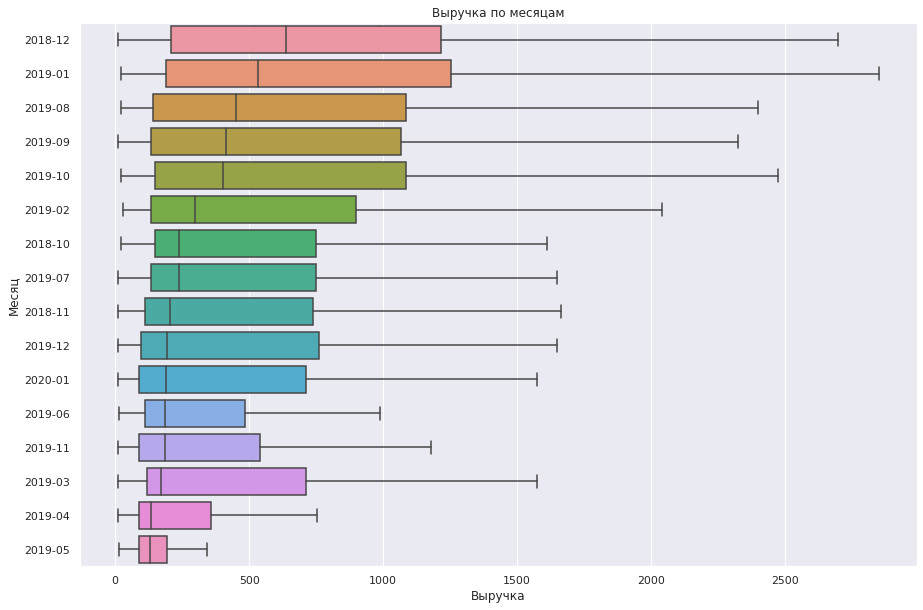

In [41]:
# Также, можно посмотреть выручку по месяцам.

year_month_rev = (ecom_online.groupby(['year_month'])['revenue'].median().sort_values(ascending=False))
plt.figure(figsize=(15,10))
sns.boxplot(x = 'revenue', 
            y = 'year_month', 
            data = ecom_online,
            showfliers=False, 
            order=year_month_rev.index)
plt.title('Выручка по месяцам')
plt.xlabel('Выручка')
plt.ylabel('Месяц')
plt.show();

Больше всего выручка была в январе 2019 года и в декабре 2018 года. Самые провальные месяцы по выручке - апрель и май 2019 года. Это соответствует предыдущему графику выручки по временам года.

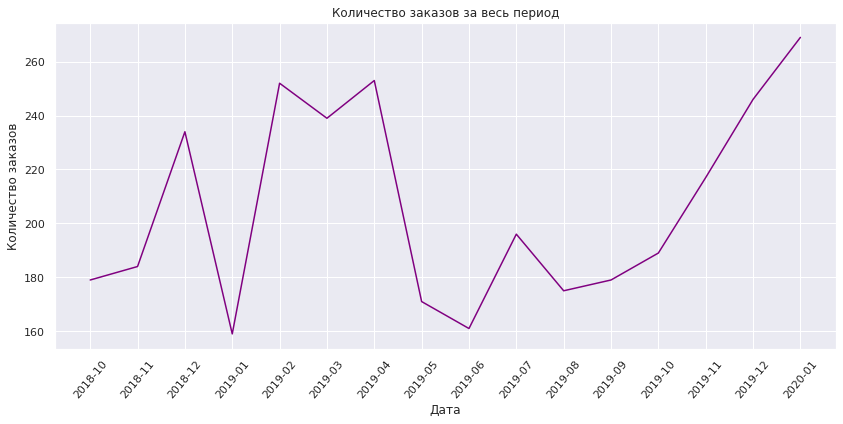

In [42]:
# Для наглядности посмотрим распределение заказов по месяцам.

orders_date = ecom_online.groupby('year_month')['order_id'].nunique().reset_index()
orders_date['year_month'] = orders_date['year_month'].astype(str)
orders_date.columns = ['date', 'orders']

plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='orders', color='purple', data=orders_date)
plt.title('Количество заказов за весь период')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.xticks(rotation=50)
plt.show();

На графике видны пики в зимние периоды. В 2018 году количество заказов выросло к декабрю почти до 235. К январю 2019 года идет резкий спад. Скорее всего это связано с новогодними праздниками. Далее, в феврале 2019 года количество заказов обновляет пик - 250. В конце весеннего периода идет постепенное снижение и минимум приходится на июнь 2019 года. Весь летний период идет некоторый боковик, который колеблется от 160 заказов до почти 200. В осенний период, начиная с сентября 2019 года, идет планомерное восстановление количества заказов переходящее в зимний период, где количество заказов снова подбирается к пиковым значениям декабря 2018 года и выходит на новые максимумы. Зимний период для компании явно является прибыльным.

**Посчитаем выручку и количество покупателей по категориям**

In [43]:
# Сгруппируем данные по категориям.

category_gr = ecom_online.groupby('category_list').agg({'revenue':'sum', 'customer_id':'nunique'})
display(category_gr)

,revenue,customer_id
category_list,,
Инструменты,135277.33,88
Товары для дома,1900462.50,1641
Товары для кухни,395732.00,422
Товары для сада,1167048.58,844


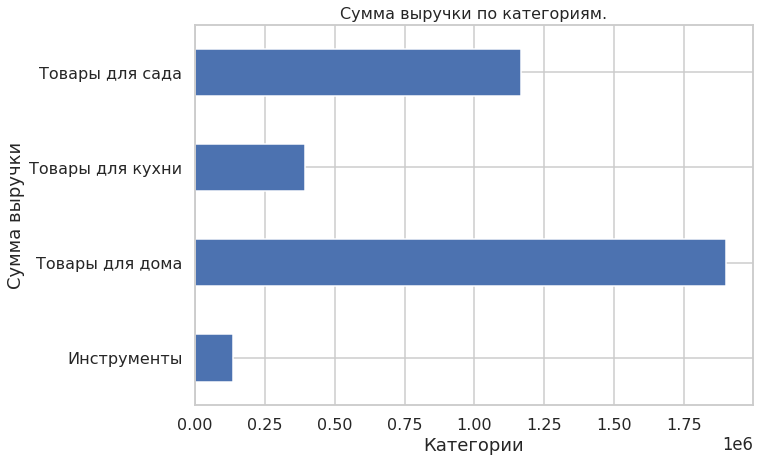

In [44]:
# Посмотрим сумму выручки по категориям на графике.

sns.set_style('whitegrid')
sns.set_context('talk')
category_gr.plot(kind='barh', y=['revenue'], figsize=(10,7), grid=True, fontsize=16, legend=False)
plt.title('Сумма выручки по категориям.', fontsize=16)
plt.xlabel('Категории')
plt.ylabel('Cумма выручки')
plt.show();

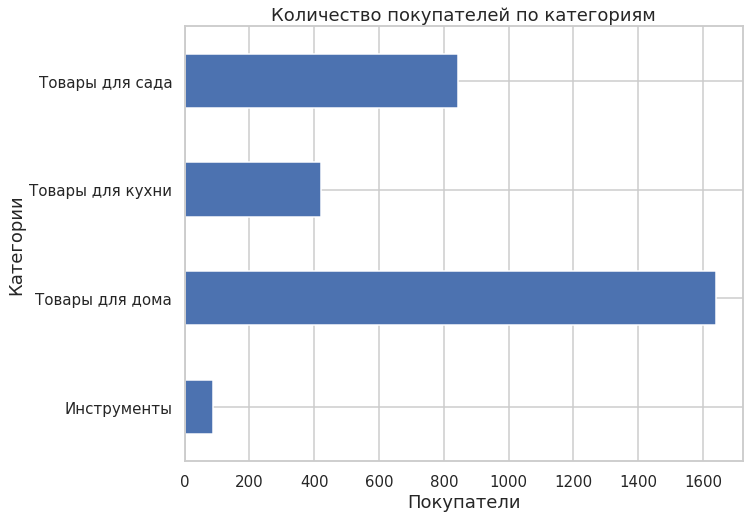

In [45]:
# Посмотрим количество покупателей по категориям.

sns.set_style('whitegrid')
sns.set_context('talk')
category_gr.plot(kind='barh', y=['customer_id'], figsize=(10, 8), grid=True, fontsize=15, legend=False)
plt.title('Количество покупателей по категориям')
plt.xlabel('Покупатели')
plt.ylabel('Категории')
plt.show();

**Вывод**

Больше всего выручки и покупателей в категории Товары для дома: 190 0462.50 у.е. и 1641 покупателей.

Следом идет категория Товары для сада: 1 167 048.58 у.е. и 844 покупателей.

Далее по убывающей - Товары для кухни с выручкой 395 732.00 у.е. и с 422 покупателями, и Инструменты с выручкой 135 277.33 и с 88 покупателями.

Здесь видно, что в суммарном соотношении, категории товары для дома и сада приносят магазину значительную часть выручки.

## Шаг 4. Сегментация покупателей на основе истории их покупок

**Сделаем кластеризацию**

In [46]:
# Добавим столбец с количеством товаров в заказе.

ecom_online['order_product_cnt'] = ecom_online.groupby('order_id')['product'].transform('count')

# Добавим столбец со стоимостью по каждой позиции в заказе.

ecom_online['price_per_product'] = ecom_online['price'] * ecom_online['quantity']

# Добавим столбец со стоимостью заказа.

ecom_online['order_price'] = ecom_online.groupby('order_id')['price_per_product'].transform('sum')

# Добавим столбец с количеством заказов на человека и средним чеком.

avg_orders_cnt_per_customers = ecom_online.groupby(
    'customer_id')['order_id'].nunique().reset_index(name='avg_orders_cnt_per_customer')
ecom_online = ecom_online.merge(avg_orders_cnt_per_customers, on='customer_id', how='left')

avg_checks = ecom_online.groupby('customer_id').agg({'price':'sum', 'order_id':'nunique'}).reset_index()
avg_checks['avg_check'] = avg_checks['price'] / avg_checks['order_id']
ecom_online = ecom_online.merge(avg_checks[['customer_id', 'avg_check']], on='customer_id', how='left')

In [47]:
# Проверим.

ecom_online.head(10)

,index,date,customer_id,order_id,product,quantity,price,year_month,month,year,revenue,lem,category_list,season_category,order_product_cnt,price_per_product,order_price,avg_orders_cnt_per_customer,avg_check
0,0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.00,2018-10,10,2018,142.00,"комнатный растение в горшок алый вера, d12, h30",Товары для дома,осень,7,142.00,1037.00,1,1037.00
1,1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.00,2018-10,10,2018,194.00,"комнатный растение в горшок кофе арабика, d12, h25",Товары для дома,осень,7,194.00,1037.00,1,1037.00
2,2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.00,2018-10,10,2018,112.00,радермахер d-12 см h-20 см,Товары для дома,осень,7,112.00,1037.00,1,1037.00
3,3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.00,2018-10,10,2018,179.00,хризолидокарпус лутесценс d-9 см,Товары для дома,осень,7,179.00,1037.00,1,1037.00
4,4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.00,2018-10,10,2018,112.00,циперус зумула d-12 см h-25 см,Товары для дома,осень,7,112.00,1037.00,1,1037.00
5,5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.00,2018-10,10,2018,164.00,шеффлер лузеан d-9 см,Товары для дома,осень,7,164.00,1037.00,1,1037.00
6,6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.00,2018-10,10,2018,134.00,юкка нитчатый d-12 см h-25-35 см,Товары для дома,осень,7,134.00,1037.00,1,1037.00
7,7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.00,2018-10,10,2018,824.00,настенный сушилка для белье Gimi Brio Super 100,Товары для дома,осень,1,824.00,824.00,1,824.00
8,8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.00,2018-10,10,2018,269.00,"таз пластмассовый 21,0 л круглый ""водолей"" С614, 1404056",Товары для дома,осень,1,269.00,269.00,2,153.50
9,10,2018-10-01 11:00:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.00,2018-10,10,2018,820.00,"вешалка для брюки металлический с резиновый покрытие 26 см цвет: синий, Attribute, AHS331",Товары для дома,осень,1,820.00,820.00,1,82.00


In [48]:
# Группируем данные по customer_id. Возьмем средние значения по переменным:

cluster = ecom_online.groupby('customer_id').agg({
    'quantity':'sum',
    'price':'mean',
    'price_per_product':'mean',
    'order_product_cnt':'mean',
    'order_price':'mean',
    'avg_check':'mean',
    'avg_orders_cnt_per_customer':'mean',
    'revenue':'mean'}).reset_index()

cluster.columns = [
    'customer_id',
    'quantity',
    'price',
    'price_per_product', # средняя стоимостью по каждой позиции в заказе
    'order_product_cnt', # среднее количество товаров в заказе
    'avg_price_per_order', # средняя цена на товар в заказе
    'avg_check', # средний чек
    'avg_orders_cnt_per_customer',
    'revenue'] # среднее количество заказов на покупателя

# Посмотрим.

cluster.sample(10)

,customer_id,quantity,price,price_per_product,order_product_cnt,avg_price_per_order,avg_check,avg_orders_cnt_per_customer,revenue
351,2600a998-670d-4750-a932-c2cdd39a607e,2,434.00,434.00,1.00,434.00,434.00,2,434.00
596,3e5908af-3bba-4fb0-90cf-31a03ddc13f2,3,22.00,66.00,1.00,66.00,22.00,1,66.00
847,5bee7748-a089-4d7c-a1ad-075cd8846a41,1,3599.00,3599.00,1.00,3599.00,3599.00,1,3599.00
1124,78b971d9-a0d5-40a1-8dd1-c3562b88dbc5,2,187.00,374.00,1.00,374.00,187.00,1,374.00
1813,c0d260e0-e0e7-4176-976b-46c6125f77d4,1,524.00,524.00,1.00,524.00,524.00,1,524.00
1025,6eeca375-0727-4407-8e46-8c2acb31fbd5,2,292.00,292.00,1.00,292.00,292.00,2,292.00
1362,93630d8b-bbf7-47db-a3f1-ff276065c532,2,371.00,371.00,1.00,371.00,371.00,2,371.00
612,3ffe7cfb-f00f-4d04-a2f2-38dfe7116cbd,5,45.00,225.00,1.00,225.00,45.00,1,225.00
144,0f0640d2-b04c-4110-8bfd-2302f6d8faa0,1,1912.00,1912.00,1.00,1912.00,1912.00,1,1912.00
676,48294bee-94cc-4eed-a7c0-7c6848b349fe,9,136.00,143.50,8.00,1148.00,1088.00,1,143.50


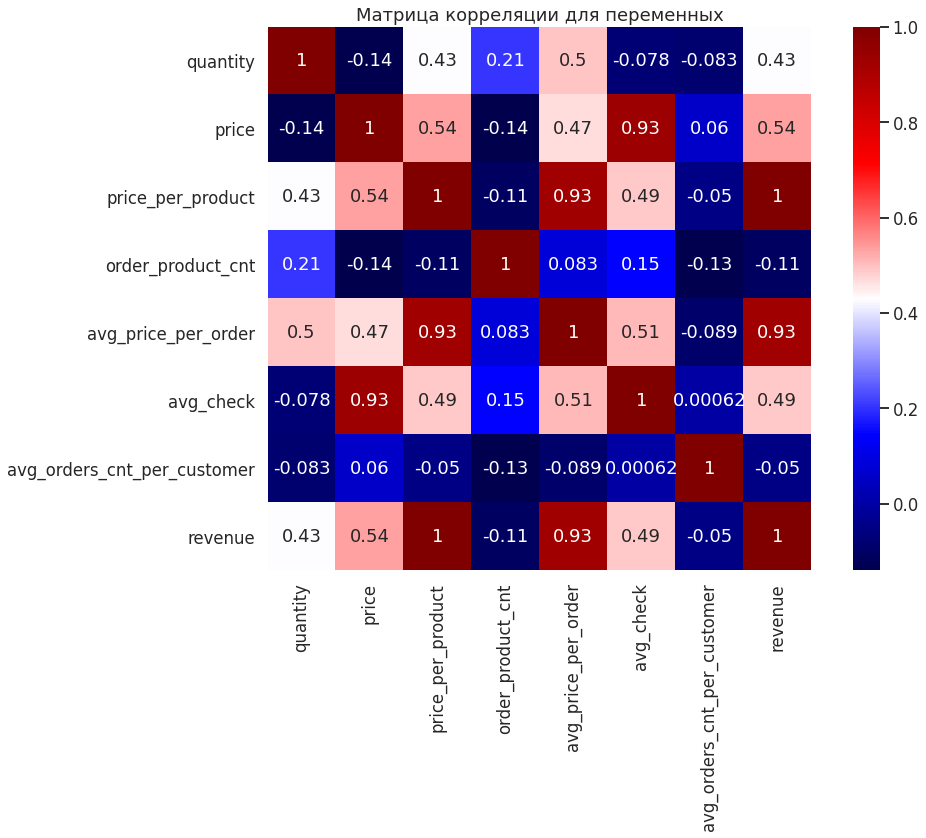

In [49]:
# Посмотрим матрицу корреляций.

corr_matrix = cluster.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='seismic')
plt.title('Матрица корреляции для переменных')
plt.show();

Видно, что есть взаимосвязь между некоторыми переменными. Взаимосвязь прослеживается между avg_price_per_order - средняя цена на товар в заказе и avg_check - средний чек (corr = 0,51). Еще есть переменные, которые положительно коррелируют со средней ценой на товар в заказе, это order_product_cnt - среднее количество товаров в заказе (corr = 0,083). Также есть корреляция с avg_check - средний чек и price_per_product - средняя стоимость по каждой позиции в заказе (corr = 0,49). И еще одна положительная корреляция: avg_check - средний чек и order_product_cnt - среднее количество товаров в заказе (corr = 0,15). Далее, положительная корреляция прослеживается у avg_price_per_order - средняя цена на товар в заказе и price_per_product - средняя стоимость по каждой позиции в заказе (corr = 0,93). И небольшая положительная корреляция между avg_check - средний чек и avg_orders_cnt_per_customer - среднее количество заказов на покупателя (corr = 0,00062).

Средний чек коррелирует с большим количеством переменных.

In [50]:
# Проведем кластеризацию. Оставляем количественные данные.

x = cluster[['price_per_product', 'order_product_cnt',  'avg_price_per_order', 'avg_check', 'avg_orders_cnt_per_customer']]

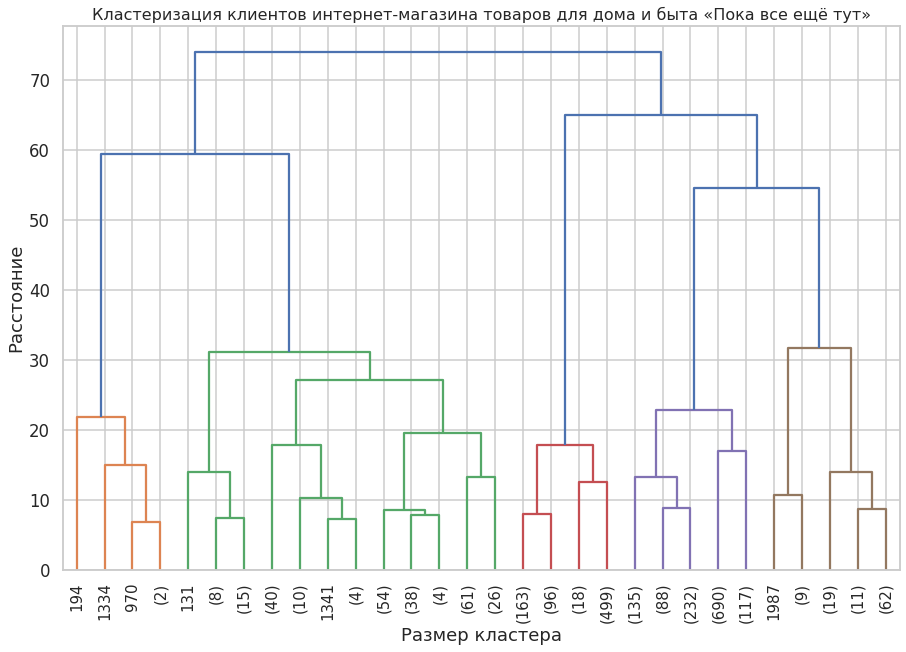

In [51]:
# Стандартизируем данные. Создадим объект класса Scaler.

sc = StandardScaler()

# Обучим модель и преобразуем набор данных.

x_sc = sc.fit_transform(x)

# Рассчитаем матрицу расстояний с помощью метода linkage.

linked = linkage(x_sc, method = 'ward')

# Построим дендрограмму.

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', show_leaf_counts=True, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=15)
plt.title('Кластеризация клиентов интернет-магазина товаров для дома и быта «Пока все ещё тут»', fontsize=16)
plt.xlabel('Размер кластера')
plt.ylabel('Расстояние')
plt.show();

Тут можно видеть, что выделяются 5 кластеров.

**Обучим модель кластеризации алгоритмом K-Means и спрогнозируем сегменты покупателей**

In [52]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)
cluster['cluster'] = labels
cluster

,customer_id,quantity,price,price_per_product,order_product_cnt,avg_price_per_order,avg_check,avg_orders_cnt_per_customer,revenue,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,138.75,138.75,4.00,555.00,555.00,1,138.75,0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.00,442.00,1.00,442.00,442.00,1,442.00,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,457.00,914.00,1.00,914.00,457.00,1,914.00,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.00,1649.00,1.00,1649.00,1649.00,1,1649.00,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,1162.00,2324.00,1.00,2324.00,1162.00,1,2324.00,0
...,...,...,...,...,...,...,...,...,...,...
2402,ff601403-b094-4b86-9ac6-264d725b9277,2,869.50,869.50,1.00,869.50,869.50,2,869.50,1
2403,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.00,397.00,1.00,397.00,397.00,1,397.00,0
2404,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.00,389.00,1.00,389.00,389.00,1,389.00,0
2405,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.00,974.00,1.00,974.00,974.00,1,974.00,0


Выполнили кластеризацию по алгоритму K-Means.

**Выведем статистику по кластерам**

In [53]:
cluster.groupby('cluster').mean().T.style.set_precision(2)

cluster,0,1,2,3,4
quantity,4.69,2.98,105.40,18.41,8.73
price,431.37,632.22,1524.23,120.32,3108.83
price_per_product,682.50,668.36,27749.87,141.96,4162.08
order_product_cnt,1.44,1.11,2.00,13.62,1.13
avg_price_per_order,789.72,685.89,33363.20,1779.27,4392.12
avg_check,508.84,644.30,1697.40,1528.34,3254.69
avg_orders_cnt_per_customer,1.00,2.02,1.20,1.07,1.28
revenue,682.50,668.36,27749.87,141.96,4162.08


**Вывод**

Кластер 0:

* price_per_product - средняя стоимостью по каждой позиции в заказе 682.50 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.44
* avg_price_per_order - средняя цена на товар в заказе 789.72 у.е.
* avg_check' - средний чек 508.84 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.00 

Кластер выделяется тем, что в нем небольшие показатели по переменным. Здесь, видмио, покупают простые розничные покупатели на небольшие суммы и малым объемом. Возможно это покупатели, которые целенаправленно берут конкретные позиции в магазине потому что им удобно их тут покупать по разным причинам.

Кластер 1:

* price_per_product - средняя стоимостью по каждой позиции в заказе 668.36 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.11
* avg_price_per_order - средняя цена на товар в заказе 685.89 у.е.
* avg_check' - средний чек 644.30 у.е.	
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 2.02

Кластер похож на предыдущий, в нем средняя стоимость по каждой позиции в заказе немного меньше, чем в Кластере 0.
Среднее количество товаров в заказе почти такая же в сревнении с предыдущим кластером. Также, показатели по средней цене на товар в заказе и средний чек колеблется наравне с Кластером 0. А вот показатель среднего количества заказов на покупателя в два раза больше. Здесь берут товар чуть больше по количеству.

Кластер 2:

* price_per_product - средняя стоимостью по каждой позиции в заказе 27749.87 у.е.
* order_product_cnt - среднее количество товаров в заказе 2.00
* avg_price_per_order - средняя цена на товар в заказе 33363.20 у.е.
* avg_check' - средний чек 1697.40 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.20

Кластер выделяется тем, что в нем средняя стоимостью по каждой позиции в заказе 27749.87 у.е. и средняя цена на товар в заказе 33363.20 у.е. Если учесть показатели по среднему количеству товаров в заказе и среднее количество заказов на покупателя, то здесь уже покупается явно не мелочевка.

Кластер 3:

* price_per_product - средняя стоимостью по каждой позиции в заказе 141.96 у.е.
* order_product_cnt - среднее количество товаров в заказе 13.62
* avg_price_per_order - средняя цена на товар в заказе 1779.27 у.е.
* avg_check - средний чек 1528.34 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.07

Кластер выделяется тем, что в нем средние показатели по переменным, но среднее количество товаров в заказе довольно большое. Предположу, что здесь оптовики, которые закупают небольшими партиями.

Кластер 4:

* price_per_product - средняя стоимостью по каждой позиции в заказе 4162.08 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.13
* avg_price_per_order - средняя цена на товар в заказе 4392.12 у.е. 
* avg_check - средний чек 3254.69 у.е.	
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.07

Хорошие показатели по средней цене на товар в заказе и средний чек, хотя количество товаров в заказе и количество заказов на покупателя небольшие. В этом кластере тоже больше качественные, чем количественные покупатели.

## Шаг 5. Проверка статистических гипотез

**Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.**

Гипотеза 1.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей отсутствует.

H1: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

*Делаем выборку по 0 и 1 кластерам.*

In [54]:
# Сгенерируем две независимые выборки.

cluster_0 = cluster[cluster['cluster']==0]['avg_check']
cluster_1 = cluster[cluster['cluster']==1]['avg_check']

In [55]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_0: {} '.format(np.var(cluster_0, ddof=1)))
print('Дисперсия кластера_1: {} '.format(np.var(cluster_1, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(cluster_1, ddof=1))/(np.var(cluster_0, ddof=1))))

Дисперсия кластера_0: 246291.45727630786 
Дисперсия кластера_1: 289569.5437240974 
Соотношение дисперсий: 1.1757189913381243 


In [56]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(cluster_0, cluster_1)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 3.347260613430138e-13
Отвергаем нулевую гипотезу


In [57]:
print('Медиана кластера_0: {} '.format(int(np.median(cluster_0))))
print('Медиана кластера_1: {} '.format(int(np.median(cluster_1))))
print('Соотношение: {:.2f}'.format(np.median(cluster_1) / np.median(cluster_0)))

Медиана кластера_0: 352 
Медиана кластера_1: 458 
Соотношение: 1.30


*Делаем выборку по 1 и 2 кластерам.*

In [58]:
# Сгенерируем две независимые выборки.

cluster_1 = cluster[cluster['cluster']==1]['avg_check']
cluster_2 = cluster[cluster['cluster']==2]['avg_check']

In [59]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_1: {} '.format(np.var(cluster_1, ddof=1)))
print('Дисперсия кластера_2: {} '.format(np.var(cluster_2, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(cluster_2, ddof=1))/(np.var(cluster_1, ddof=1))))

Дисперсия кластера_1: 289569.5437240974 
Дисперсия кластера_2: 3552711.8 
Соотношение дисперсий: 12.268941527169144 


In [60]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(cluster_1, cluster_2)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 0.11684650646628486
Не получилось отвергнуть нулевую гипотезу


In [61]:
print('Медиана кластера_1: {} '.format(int(np.median(cluster_1))))
print('Медиана кластера_2: {} '.format(int(np.median(cluster_2))))
print('Соотношение: {:.2f}'.format(np.median(cluster_2) / np.median(cluster_1)))

Медиана кластера_1: 458 
Медиана кластера_2: 1039 
Соотношение: 2.27


*Делаем выборку по 2 и 3 кластерам.*

In [62]:
# Сгенерируем две независимые выборки.

cluster_2 = cluster[cluster['cluster']==2]['avg_check']
cluster_3 = cluster[cluster['cluster']==3]['avg_check']

In [63]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_2: {} '.format(np.var(cluster_2, ddof=1)))
print('Дисперсия кластера_3: {} '.format(np.var(cluster_3, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(cluster_3, ddof=1))/(np.var(cluster_2, ddof=1))))

Дисперсия кластера_2: 3552711.8 
Дисперсия кластера_3: 726359.9446811636 
Соотношение дисперсий: 0.20445225663425998 


In [64]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(cluster_2, cluster_3)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 0.5886781640312297
Не получилось отвергнуть нулевую гипотезу


In [65]:
print('Медиана кластера_2: {} '.format(int(np.median(cluster_2))))
print('Медиана кластера_3: {} '.format(int(np.median(cluster_3))))
print('Соотношение: {:.2f}'.format(np.median(cluster_3) / np.median(cluster_2)))

Медиана кластера_2: 1039 
Медиана кластера_3: 1320 
Соотношение: 1.27


*Делаем выборку по 3 и 4 кластерам.*

In [66]:
# Сгенерируем две независимые выборки.

cluster_3 = cluster[cluster['cluster']==3]['avg_check']
cluster_4 = cluster[cluster['cluster']==4]['avg_check']

In [67]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_3: {} '.format(np.var(cluster_3, ddof=1)))
print('Дисперсия кластера_4: {} '.format(np.var(cluster_4, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(cluster_4, ddof=1))/(np.var(cluster_3, ddof=1))))

Дисперсия кластера_3: 726359.9446811636 
Дисперсия кластера_4: 3503240.1899288283 
Соотношение дисперсий: 4.823008503678681 


In [68]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(cluster_3, cluster_4)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 6.1296901749508376e-18
Отвергаем нулевую гипотезу


In [69]:
print('Медиана кластера_3: {} '.format(int(np.median(cluster_3))))
print('Медиана кластера_4: {} '.format(int(np.median(cluster_4))))
print('Соотношение: {:.2f}'.format(np.median(cluster_4) / np.median(cluster_3)))

Медиана кластера_3: 1320 
Медиана кластера_4: 2935 
Соотношение: 2.22


*Делаем выборку по 4 и 0 кластерам.*

In [70]:
# Сгенерируем две независимые выборки.

cluster_4 = cluster[cluster['cluster']==4]['avg_check']
cluster_0 = cluster[cluster['cluster']==0]['avg_check']

In [71]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_4: {} '.format(np.var(cluster_4, ddof=1)))
print('Дисперсия кластера_0: {} '.format(np.var(cluster_0, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(cluster_0, ddof=1))/(np.var(cluster_4, ddof=1))))

Дисперсия кластера_4: 3503240.1899288283 
Дисперсия кластера_0: 246291.45727630786 
Соотношение дисперсий: 0.07030390265113723 


In [72]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(cluster_4, cluster_0)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 1.735741506484491e-90
Отвергаем нулевую гипотезу


In [73]:
print('Медиана кластера_4: {} '.format(int(np.median(cluster_4))))
print('Медиана кластера_0: {} '.format(int(np.median(cluster_0))))
print('Соотношение: {:.2f}'.format(np.median(cluster_0) / np.median(cluster_4)))

Медиана кластера_4: 2935 
Медиана кластера_0: 352 
Соотношение: 0.12


**Вывод**

При выборке по 0 и 1 кластерам:

P-value = 3.34. Мы отвергли нулевую гипотезу.

При выборке по 1 и 2 кластерам:

P-value = 0.11. Не получилось отвергнуть нулевую гипотезу.

При выборке по 2 и 3 кластерам:

P-value = 0.58. Не получилось отвергнуть нулевую гипотезу.

При выборке по 3 и 4 кластерам:

P-value = 6.12. Мы отвергли нулевую гипотезу.

При выборке по 4 и 0 кластерам:

P-value = 1.73. Мы отвергли нулевую гипотезу.

Из 5 раз - 3 раза была отвергнута нулевая гипотеза, 2 раза не получилось отвергнуть нулевую гипотезу.

Таким образом, исходя из большинства в 1, статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

**Статистическая значимость различий в среднем объёме продаж между сегментами присутствует.**

Гипотеза 2.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем объёме продаж между сегментами отсутствует.

H1: Статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

In [74]:
display(cluster.groupby(['cluster']).mean().T)

cluster,0,1,2,3,4
quantity,4.69,2.98,105.40,18.41,8.73
price,431.37,632.22,1524.23,120.32,3108.83
price_per_product,682.50,668.36,27749.87,141.96,4162.08
order_product_cnt,1.44,1.11,2.00,13.62,1.13
avg_price_per_order,789.72,685.89,33363.20,1779.27,4392.12
avg_check,508.84,644.30,1697.40,1528.34,3254.69
avg_orders_cnt_per_customer,1.00,2.02,1.20,1.07,1.28
revenue,682.50,668.36,27749.87,141.96,4162.08


*Делаем выборку по 0 и 1 кластерам.*

In [75]:
# Сгенерируем две независимые выборки.

s_cluster_0 = cluster[cluster['cluster']==0]['revenue']
s_cluster_1 = cluster[cluster['cluster']==1]['revenue']

In [76]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_0: {} '.format(np.var(s_cluster_0, ddof=1)))
print('Дисперсия кластера_1: {} '.format(np.var(s_cluster_1, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(s_cluster_1, ddof=1))/(np.var(s_cluster_0, ddof=1))))

Дисперсия кластера_0: 478562.9522237346 
Дисперсия кластера_1: 311936.6183679865 
Соотношение дисперсий: 0.6518194041526055 


In [77]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(s_cluster_0, s_cluster_1)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 0.09466569079213594
Не получилось отвергнуть нулевую гипотезу


In [78]:
print('Медиана кластера_0: {} '.format(int(np.median(s_cluster_0))))
print('Медиана кластера_1: {} '.format(int(np.median(s_cluster_1))))
print('Соотношение: {:.2f}'.format(np.median(s_cluster_1) / np.median(s_cluster_0)))

Медиана кластера_0: 450 
Медиана кластера_1: 480 
Соотношение: 1.07


*Делаем выборку по 1 и 2 кластерам.*

In [79]:
# Сгенерируем две независимые выборки.

s_cluster_1 = cluster[cluster['cluster']==1]['revenue']
s_cluster_2 = cluster[cluster['cluster']==2]['revenue']

In [80]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_1: {} '.format(np.var(s_cluster_1, ddof=1)))
print('Дисперсия кластера_2: {} '.format(np.var(s_cluster_2, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(s_cluster_2, ddof=1))/(np.var(s_cluster_1, ddof=1))))

Дисперсия кластера_1: 311936.6183679865 
Дисперсия кластера_2: 249383128.75555557 
Соотношение дисперсий: 799.4673086484588 


In [81]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(s_cluster_1, s_cluster_2)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 0.00011437980116564217
Отвергаем нулевую гипотезу


In [82]:
print('Медиана кластера_1: {} '.format(int(np.median(s_cluster_1))))
print('Медиана кластера_2: {} '.format(int(np.median(s_cluster_2))))
print('Соотношение: {:.2f}'.format(np.median(s_cluster_2) / np.median(s_cluster_1)))

Медиана кластера_1: 480 
Медиана кластера_2: 26616 
Соотношение: 55.45


*Делаем выборку по 2 и 3 кластерам.*

In [83]:
# Сгенерируем две независимые выборки.

s_cluster_2 = cluster[cluster['cluster']==2]['revenue']
s_cluster_3 = cluster[cluster['cluster']==3]['revenue']

In [84]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_2: {} '.format(np.var(s_cluster_2, ddof=1)))
print('Дисперсия кластера_3: {} '.format(np.var(s_cluster_3, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(s_cluster_3, ddof=1))/(np.var(s_cluster_2, ddof=1))))

Дисперсия кластера_2: 249383128.75555557 
Дисперсия кластера_3: 4953.460423334392 
Соотношение дисперсий: 1.9862852984693106e-05 


In [85]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(s_cluster_2, s_cluster_3)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 5.1051987464082376e-08
Отвергаем нулевую гипотезу


In [86]:
print('Медиана кластера_2: {} '.format(int(np.median(s_cluster_2))))
print('Медиана кластера_3: {} '.format(int(np.median(s_cluster_3))))
print('Соотношение: {:.2f}'.format(np.median(s_cluster_3) / np.median(s_cluster_2)))

Медиана кластера_2: 26616 
Медиана кластера_3: 128 
Соотношение: 0.00


*Делаем выборку по 3 и 4 кластерам.*

In [87]:
# Сгенерируем две независимые выборки.

s_cluster_3 = cluster[cluster['cluster']==3]['revenue']
s_cluster_4 = cluster[cluster['cluster']==4]['revenue']

In [88]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_3: {} '.format(np.var(s_cluster_3, ddof=1)))
print('Дисперсия кластера_4: {} '.format(np.var(s_cluster_4, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(s_cluster_4, ddof=1))/(np.var(s_cluster_3, ddof=1))))

Дисперсия кластера_3: 4953.460423334392 
Дисперсия кластера_4: 5321963.991874309 
Соотношение дисперсий: 1074.3931589326926 


In [89]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(s_cluster_3, s_cluster_4)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 4.416689043519738e-40
Отвергаем нулевую гипотезу


In [90]:
print('Медиана кластера_3: {} '.format(int(np.median(s_cluster_3))))
print('Медиана кластера_4: {} '.format(int(np.median(s_cluster_4))))
print('Соотношение: {:.2f}'.format(np.median(s_cluster_4) / np.median(s_cluster_3)))

Медиана кластера_3: 128 
Медиана кластера_4: 3562 
Соотношение: 27.72


*Делаем выборку по 4 и 0 кластерам.*

In [91]:
# Сгенерируем две независимые выборки.

s_cluster_4 = cluster[cluster['cluster']==4]['revenue']
s_cluster_0 = cluster[cluster['cluster']==0]['revenue']

In [92]:
# Оценим дисперсию по выборкам. Если различие будет более 5% - принимаем вывод, что дисперсии не равны.

print('Дисперсия кластера_4: {} '.format(np.var(s_cluster_4, ddof=1)))
print('Дисперсия кластера_0: {} '.format(np.var(s_cluster_0, ddof=1)))
print('Соотношение дисперсий: {} '.format((np.var(s_cluster_0, ddof=1))/(np.var(s_cluster_4, ddof=1))))

Дисперсия кластера_4: 5321963.991874309 
Дисперсия кластера_0: 478562.9522237346 
Соотношение дисперсий: 0.08992224542563891 


In [93]:
# Проверим гипотезы.

alpha = 0.05

results = stats.mannwhitneyu(s_cluster_4, s_cluster_0)

print('P-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value = 8.081155529013755e-108
Отвергаем нулевую гипотезу


In [94]:
print('Медиана кластера_4: {} '.format(int(np.median(s_cluster_4))))
print('Медиана кластера_0: {} '.format(int(np.median(s_cluster_0))))
print('Соотношение: {:.2f}'.format(np.median(s_cluster_0) / np.median(s_cluster_4)))

Медиана кластера_4: 3562 
Медиана кластера_0: 450 
Соотношение: 0.13


**Вывод**

При выборке по 0 и 1 кластерам:

P-value = 0.094. Не получилось отвергнуть нулевую гипотезу.

При выборке по 1 и 2 кластерам:

P-value = P-value = 0.00011. Мы отвергли нулевую гипотезу.

При выборке по 2 и 3 кластерам:

P-value = 5.10. Мы отвергли нулевую гипотезу.

При выборке по 3 и 4 кластерам:

P-value = 4.41. Мы отвергли нулевую гипотезу.

При выборке по 4 и 0 кластерам:

P-value = 8.08. Мы отвергли нулевую гипотезу.

Таким образом, статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

In [95]:
# Объединим кластеры с датасетом.

cluster = cluster[['customer_id', 'cluster']].reset_index(drop=True)
ecom_online = ecom_online.merge(cluster, on='customer_id', how='left')

_Проверим гипотезы._

In [96]:
# Функция для проведения теста Шапиро-Уилка на нормальность распределения.

def shapiro_test(data, columns):
    results = {}
    for column in columns:
        stat, p = shapiro(data[column])
        results[column] = (stat, p)
    return results

# Функция для проведения теста Левена.
def levene_test(data, group_column, value_columns):
    results = {}
    for column in value_columns:
        groups = [group[column].values for name, group in data.groupby(group_column)]
        stat, p = levene(*groups)
        results[column] = (stat, p)
    return results

columns_to_test = ['avg_check', 'revenue']
shapiro_results = shapiro_test(ecom_online, columns_to_test)
levene_results = levene_test(ecom_online, 'cluster', columns_to_test)

# Вывод результатов теста Шапиро-Уилка.
print('Результаты теста Шапиро-Уилка:')
for column, (stat, p) in shapiro_results.items():
    print(f"{column}: Статистика = {stat}, p-value={p}")

# Вывод результатов теста Левена.
print('\nРезультаты теста Левена:')
for column, (stat, p) in levene_results.items():
    print(f"{column}: Статистика = {stat}, p-value={p}")


Результаты теста Шапиро-Уилка:
avg_check: Статистика = 0.7856587171554565, p-value=0.0
revenue: Статистика = 0.3383758068084717, p-value=0.0

Результаты теста Левена:
avg_check: Статистика = 216.00295965402358, p-value=1.0817166121381863e-171
revenue: Статистика = 931.6327672671046, p-value=0.0


**При проведении множественных тестов скорректировать уровень значимости методом Бонферрони: уровень значимости 0.05/5 = 0.01**

In [97]:
# Функция для проведения теста Крускала-Уоллиса.

def kruskal_test(data, group_column, value_column, alpha_corrected):
    groups = [group[value_column].values for name, group in data.groupby(group_column)]
    stat, p = kruskal(*groups)
    result = f"{value_column}:\n"
    result += f"  Статистика = {stat:.4f}, P-value = {p:.4f}\n"
    if p < alpha_corrected:
        result += f"  Отвергаем нулевую гипотезу: Существуют значимые различия между кластерами для {value_column}.\n"
        result += f"  Это говорит о том, что распределение в {value_column} отличается между кластерами.\n"
    else:
        result += f"  Не получилось отвергнуть нулевую гипотезу: Не существуют значимые различия между кластерами для {value_column}.\n"
        result += f"  Это говорит о том, что распределение в {value_column} между кластерами схоже.\n"
    return result

# Корректированный уровень значимости.
alpha_corrected = 0.01

# Проведение тестов для каждой метрики.
columns_to_test = ['avg_check', 'revenue']

# Вывод результатов.
for column in columns_to_test:
    result = kruskal_test(ecom_online, 'cluster', column, alpha_corrected)
    print(result)

avg_check:
  Статистика = 2031.3646, P-value = 0.0000
  Отвергаем нулевую гипотезу: Существуют значимые различия между кластерами для avg_check.
  Это говорит о том, что распределение в avg_check отличается между кластерами.

revenue:
  Статистика = 1348.6181, P-value = 0.0000
  Отвергаем нулевую гипотезу: Существуют значимые различия между кластерами для revenue.
  Это говорит о том, что распределение в revenue отличается между кластерами.



Средний чек:

P-value = 0.0000, Статистика = 2031.3646

Мы отвергли нулевую гипотезу. Это говорит о том, что существуют значимые различия между кластерами для среднего чека.

Выручка:

P-value = 0.0000, Статистика = 1348.6181

Мы отвергли нулевую гипотезу. Это говорит о том, что существуют значимые различия между кластерами для среднем объёме заказов.

Тесты Крускала-Уоллиса показали различия между кластерами для обеих метрик. Таким образом, это подтверждает, что кластеры имеют статистически значимые различия в среднем чеке и среднем объеме заказов.

In [98]:
# Посотмри по каждому кластеру в разрезе категорий товара средний чек и средний объёме продаж.

cluster_0_categories = ecom_online.loc[ecom_online['cluster'] == 0].groupby('category_list').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_0_categories

,category_list,avg_check,revenue
0,Инструменты,751.53,988.81
1,Товары для сада,661.43,388.93
2,Товары для дома,545.52,593.13
3,Товары для кухни,497.86,757.09


In [99]:
cluster_1_categories = ecom_online.loc[ecom_online['cluster'] == 1].groupby('category_list').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_1_categories

,category_list,avg_check,revenue
0,Инструменты,866.22,1189.53
1,Товары для сада,657.71,501.97
2,Товары для дома,633.62,665.15
3,Товары для кухни,604.92,574.43


In [100]:
cluster_2_categories = ecom_online.loc[ecom_online['cluster'] == 2].groupby('category_list').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_2_categories

,category_list,avg_check,revenue
0,Товары для сада,2724.00,28544.00
1,Товары для дома,1284.00,34221.33
2,Товары для кухни,1039.00,5613.33


In [101]:
cluster_3_categories = ecom_online.loc[ecom_online['cluster'] == 3].groupby('category_list').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_3_categories

,category_list,avg_check,revenue
0,Товары для сада,1813.08,126.20
1,Товары для дома,1751.55,142.17
2,Товары для кухни,1566.03,169.50


In [102]:
cluster_4_categories = ecom_online.loc[ecom_online['cluster'] == 4].groupby('category_list').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_4_categories

,category_list,avg_check,revenue
0,Товары для сада,3898.47,4098.64
1,Инструменты,3097.12,2958.81
2,Товары для дома,3009.88,3957.16
3,Товары для кухни,2375.30,2675.04


In [103]:
# # Посотмри по каждому кластеру в разрезе сезонности средний чек и средний объёме продаж.

cluster_0_season = ecom_online.loc[ecom_online['cluster'] == 0].groupby('season_category').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_0_season

,season_category,avg_check,revenue
0,осень,686.25,565.75
1,весна,542.96,461.04
2,лето,532.18,531.27
3,зима,520.56,670.99


In [104]:
cluster_1_season = ecom_online.loc[ecom_online['cluster'] == 1].groupby('season_category').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_1_season

,season_category,avg_check,revenue
0,осень,665.45,586.81
1,зима,657.55,640.36
2,лето,621.67,622.82
3,весна,596.04,579.53


In [105]:
cluster_2_season = ecom_online.loc[ecom_online['cluster'] == 2].groupby('season_category').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_2_season

,season_category,avg_check,revenue
0,осень,1586.86,8292.86
1,зима,1426.00,28650.00
2,лето,148.00,49432.00


In [106]:
cluster_3_season = ecom_online.loc[ecom_online['cluster'] == 3].groupby('season_category').agg({
    'avg_check':'mean', 
    'revenue': 'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_3_season

,season_category,avg_check,revenue
0,лето,2228.87,140.11
1,весна,1829.26,125.74
2,зима,1440.37,110.41
3,осень,1422.56,150.43


In [107]:
cluster_4_season = ecom_online.loc[ecom_online['cluster'] == 4].groupby('season_category').agg({
    'avg_check':'mean', 
    'revenue':'mean'}).sort_values(by=['avg_check', 'revenue'], ascending=False).head().reset_index()
cluster_4_season

,season_category,avg_check,revenue
0,весна,3653.79,4097.88
1,лето,3627.78,4743.24
2,осень,3210.21,3240.15
3,зима,3054.88,4065.62


Здесь мы наблюдаем следующее:

Кластер 0 по категориям товаров:

* Категория Инструменты лидирует по среднему чеку 751.53 у.е. и среднему объёму продаж 988.81 у.е.
* Категория Товары для сада идет за предыдущей категорией по среднему чеку 661.43 у.е., но вот объём продаж тут небольшой по сравнению со всеми категориями - 388.93 у.е
* Категория Товары для дома показывают третье место по среднему чеку 545.52 у.е. и среднему объёму продаж в 593.13 у.е.
* Категория Товары для кухни представляет собой самый маленький средний чек по сравнению с другими, но объёму продаж тут довольно хороший - 757.09 у.е.


по сезонности:

* осень	даёт средний чек 686.25 у.е. и 565.75 у.е. в среднем объёме продаж.
* весна, лето и зима по среднему чеку почти в одном диапазоне: 542.96 у.е., 532.18 у.е. и 520.56 у.е. соответственно. По объёму продаж, по всем сезонам лидирует зима - 670.99 у.е.

Тут можно обратить внимание на Категорию Инструменты и на осенний период.

Кластер 1 по категориям товаров:

* Категория Инструменты лидирует по среднему чеку 866.22 у.е. и среднему объёму продаж 1189.53 у.е.
* Категории Товары для сада, Категория Товары для дома и Товары для кухни идут следом по среднему чеку практически в одном диапазоне: 657.71 у.е., 633.62 у.е. и 604.92 у.е. соответственно. По среднему объёму продаж 501.97 у.е., 665.15 у.е. и 574.43 у.е. соответственно.

по сезонности:

* осень - лидирует по среднему чеку 665.45 у.е. и средний объём продаж 586.81 у.е.
* остальные сезоны не сильно отстают по среднему чеку - на втором месте зима, далее лето и весна. По объему продаж в этом кластере лидирует зима - 640.36 у.е. 

Тут можно также обратить внимание на Категорию Инструменты и осенний и зимний периоды.

Кластер 2 по категориям товаров:

* Здесь лидирует категория Товары для сада со средним чеком 2724.00 у.е., но по объёму продаж лидирует категория Товары для дома  34221.33 у.е. со средним чеком 1284.00 у.е. Замыкает лидерство сегмент Товары для кухни.
* Категория Инструменты в этот кластер не попала.

по сезонности:

* Осень и зима тут в лидерах совсем с небольшим отрывом друг от друга по среднему чеку: 1586.86 у.е. и 1426.00 у.е. соответственно.
* Лето здесь совсем с небольшими показателями по среднему чеку 148.00 у.е., зато лидирует по объёму продаж - 49432.00 у.е., самый большой показатель в этом кластере по сезонности.
* Весна в данном кластере не присутствует.

Тут можно обратить внимание на Категорию Товары для сада и Товары для дома. Осенний и зимний периоды.
Также, можно заострить внимание на летний период с его объёмом продаж в 49432.00 у.е.

Кластер 3 по категориям товаров:

* Категория Товары для сада здесь в лидерах по среднему чеку - 1813.08 у.е., а вот по объёму продаж Товары для кухни - 169.50
* Категория Инструменты в этот кластер также не попала.

по сезонности:

* лето в лидерах по среднему чеку - 2228.87 у.е., по объёму продаж - осень и лето.

Тут можно обратить внимание также на Категорию Товары для сада и Товары для кухни. Осенний и летний периоды.

Кластер 4 по категориям товаров:

* Категория Товары для сада как по чеку, так и по объёму продаж безусловный лидер - 3898.47 у.е. и 4098.64 у.е. соответственно.

по сезонности:

* весна в лидерах по среднему чеку - 3653.79 у.е., по выручке лидирует лето - 4743.24 у.е.

Тут можно обратить внимание на Категорию Товары для сада. Весенний и летний периоды.

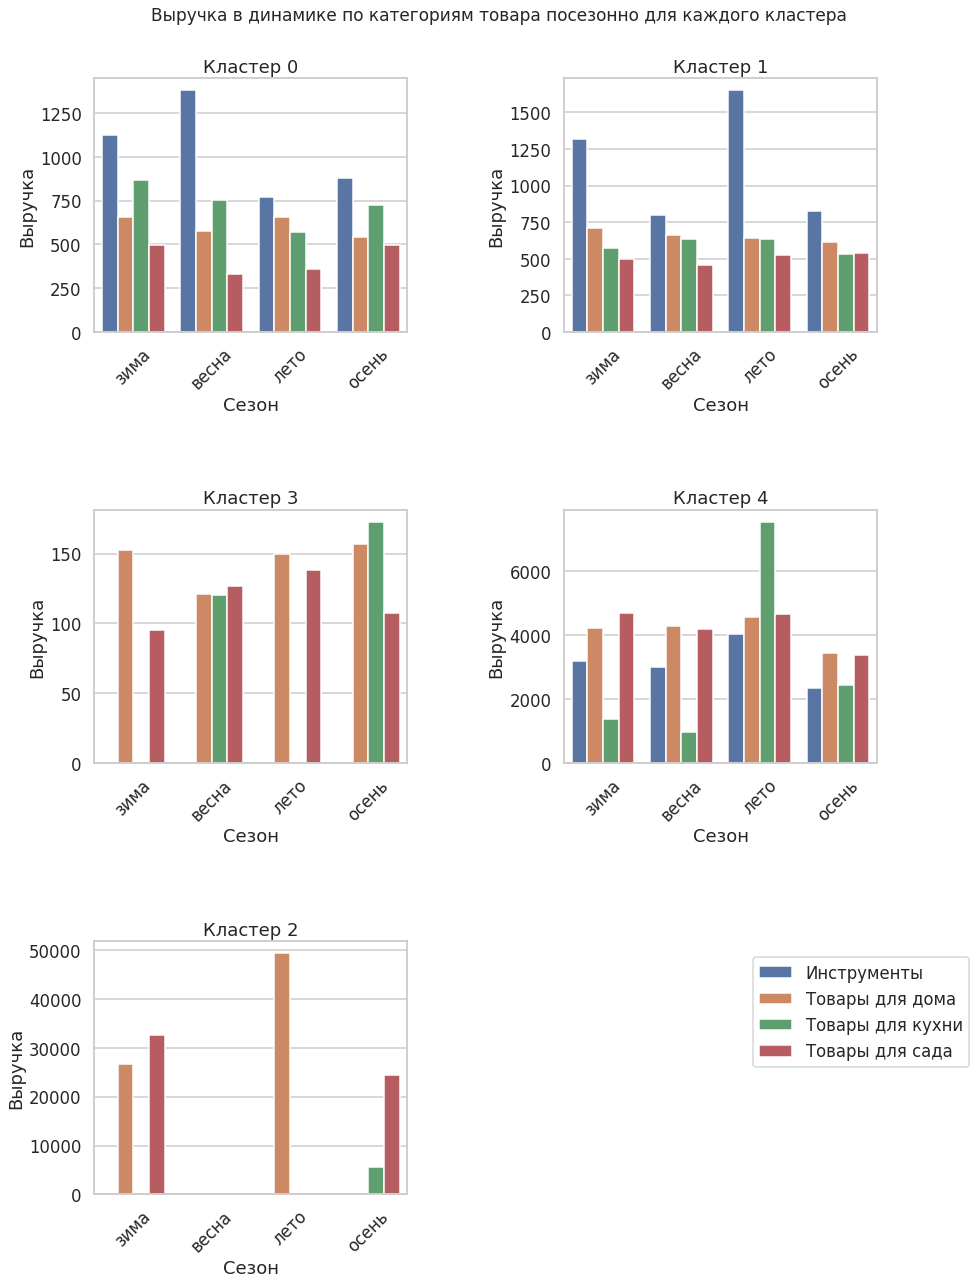

In [108]:
# Посмотрим выручку в динамике по категориям товара посезонно для каждого кластера.

cluster_season_category = ecom_online.pivot_table(index=[
    'season_category', 'cluster'], columns='category_list', values='revenue', aggfunc='mean')

df = cluster_season_category.reset_index().melt(id_vars=[
    'season_category', 
    'cluster'], var_name='category_list', value_name='revenue')

season_order = ['зима', 'весна', 'лето', 'осень']

df['season_category'] = pd.Categorical(df['season_category'], categories=season_order, ordered=True)

unique_categories = sorted(df['category_list'].unique())

fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], hspace=0.7, wspace=0.5)

clusters = df['cluster'].unique()

for i, cluster in enumerate(clusters):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    clusters_data = df[df['cluster'] == cluster]
    sns.barplot(x='season_category', y='revenue', hue='category_list', hue_order=unique_categories, data=clusters_data, ax=ax)
    ax.set_title(f'Кластер {cluster}')
    ax.set_xlabel('Сезон')
    ax.set_ylabel('Выручка')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()

plt.legend(bbox_to_anchor=(2.05 , 1), loc='upper left', borderaxespad=1)

fig.subplots_adjust(right=0.85, top=0.9, hspace=0.7, wspace=0.5)

fig.suptitle('Выручка в динамике по категориям товара посезонно для каждого кластера', fontsize=17, y=0.95)

plt.show();

Кластер 0:

Лидирует по выручке Категория Инструменты по всем сезонам. Весной этот показатель больше всего - превышает показатель в 1250 у.е. На втором месте зима с приблизительным показателем в 1150 у.е. Далее осень и лето.

Кластер 1:

Также лидирует Категория Инструменты по всем сезонам. Больше всего этот показатель приходится на лето - более 1600 у.е. На втором месте по всем сезонам идут Товары для дома. На третьем месте Товары для кухни. Эта категория имеет почти такие же значения, как и Товары для дома. Очень близко по показателям выручки. Товары для сада расположились на 4 месте и видно, что осенью немного обогнали Товары для сада по показателю.

Кластер 3:

Здесь в лидерах Товары для кухни в осенний период. Весной эта категория показывает почти равную динамику с категориями Товары для дома и Товары для сада. Категория Инструменты в этом кластере не представлена, видимо, продаж не было совсем.

Кластер 4:

Здесь довольно уверенно показывает себя в летний период Категория Товары для кухни - более 7000 у.е. Также, здесь наблюдается хорошая динамика по выручке у категорий Товары для дома и сада. У Категории Инструментов тоже хорошие показатели, но здесь они на последних местах по выручке.

_Кластер 2_:

На этот кластер можно обратить отдельное внимание, так как в нем представлены всего 3 категории, исключая Инструменты. В летний сезон можно наблюдать очень хорошую динамику у категории Товары для дома. Другие категории по этому показателю в этом сезоне не представлены. Весна для этого кластера вообще является провальным сезоном - показатели отсутствуют. В зимний период можно наблюдать динамику по товарам для сада и дома. Осенью, по категориям представлены только Товары для сада с показателем около 25000 у.е. и совсем небольшим показателем идут Товары для кухни - 5000 у.е.


## Общие выводы и рекомендации

**При загрузки, обработки и изучении данных было выявлено,** что в датасете ecom_online присутствует 6 столбцов, и он состоит из 7474 наблюдений. Вес 350.5+ KB.

Дубликаты и пропуски отсутствуют. Названия столбцов в датаcете приведены к нижнему регистру и нужному формату.

Далее, был приведен столбец с датой нужный формат. Проверили, за какой период предоставлены данные - данные предоставлены с 2018-10-01 00:00:00 по 2020-01-31 15:00:00.

При выявлении 1886 неявных дубликатов - удалили их, так как это скорее всего и есть то задвоение заказов о которых предупреждали, когда из интернета и из системы идет один и тот же заказ.

Удалили заказы, в которых есть разные даты, так как это похоже на сбои при заказе, либо ошибку в записи данных и тестовый заказ для проверки системы на 1000 единиц одного наименования товара. Также, воспользовались 99м перцентилем, чтобы отсечь аномальных клиентов.

Создали отдельно колонки с месяцем и годом. Также, был добавлен столбец с выручкой по заказам.

**В исследовательском анализе данных** была проведена категоризация наименования товара. При рассмотрении категорий заметно, что больше всего товаров для дома и сада (46% и 42,4% соответственно). На третьем месте товары для кухни, их всего 9,8%. Инструменты включают в себя 1,8% товаров.

Если смотреть рейтинг по самым продаваемым товарам в каждой категории по количеству заказов, то в категории Товары для сада в лидерах продаж идет Пеларгония розебудная Red Pandora укорененный черенок - 63 заказа с выручкой 10659.33 у.е. Зато, на третьем месте Сумка-тележка 2-х колесная Gimi Argo синяя - 44 заказа, но выручка по ней больше - 47258.00 у.е.

В категории Товары для дома можно видеть, что самое продаваемое наименование - Пеларгония зональная диам. 12 см сиреневый полумахровый. 50 заказов с выручкой 9633.00 у.е.

В категории Инструменты на первом месте по количеству продаж идет Стяжка оконная с болтом СТ-55 цинк, 1108354 - 5 заказов, выручка составила 748.33 у.е. Но, если смотреть по выручке, то здесь лидирует Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646 - 8997.00 у.е. всего с 3 заказами.

И в категории Товары для кухни можно увидеть, что на все 5 товаров рейтинга сделано по 5 заказов. Больше всего выручка у Скатерть Dasch Донна Роза из ПВХ 0401-2 Розы круглая 152 см 5974, потому что в каком-то из заказов было заказано 2шт., так как общее количество по 5 заказам - 6шт. Поэтому, эта позиция лидирует по выручке 2652.00у.е. Но, Овощеварка алюминиевая Scovo МТ-045, Хозлэнд, 1502079 не сильно отстает - 2245.00 у.е.

По рейтингу с самыми прибыльными товарами в каждой категории видно следующее:

* По категории Товары для дома, самым прибыльным является Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок - 53232.00 у.е.

* В категории Товары для сада, самым прибыльным является Сумка-тележка 2-х колесная Gimi Argo синяя - 47258.00 у.е.

* В категории Товары для кухни, самым прибыльным является Набор ножей Attribute CHEF 5 предметов AKF522 - 29248.00 у.е.

* В категории Инструменты, самым прибыльным является Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646 - 8997.00 у.е.

В сезонности товаров по категориям и продаж категорий товаров по временам года, можно сказать, что здесь в лидерах категория Инструменты. Затем, Товары для кухни и Товары для дома практически на одном уровне. Товары для кухни немного больше по выручке. Замыкает рейтинг категория Товары для сада.

Если смотреть по временам года, то видно, что на зиму приходится больше всего выручки. Чуть меньше на осень и лето. Весной этот показатель небольшой.

Если смотреть выручку по месяцам, то больше всего выручка была в январе 2019 года и в декабре 2018 года. Самые провальные месяцы по выручке - апрель и май 2019 года. Это соответствует предыдущему графику выручки по временам года.

Если посмотреть распределение заказов по месяцам, то на графике видны пики в зимние периоды. В 2018 году количество заказов выросло к декабрю почти до 235. К январю 2019 года идет резкий спад. Скорее всего это связано с новогодними праздниками. Далее, в феврале 2019 года количество заказов обновляет пик - 250. В конце весеннего периода идет постепенное снижение и минимум приходится на июнь 2019 года. Весь летний период идет некоторый боковик, который колеблется от 160 заказов до, почти, 200. В осенний период, начиная с сентября 2019 года, идет планомерное восстановление количества заказов переходящее в зимний период, где количество заказов снова подбирается к пиковым значениям декабря 2018 года и выходит на новые максимумы. Зимний период для компании явно является прибыльным.

Выручка и количество покупателей по категориям говорит нам, что больше всего выручки и покупателей в категории Товары для дома: 190 0462.50 у.е. и 1641 покупателей. Следом идет категория Товары для сада: 1 167 048.58 у.е. и 844 покупателей. Далее по убывающей - Товары для кухни с выручкой 395 732.00 у.е. и с 422 покупателями, и Инструменты с выручкой 135 277.33 и с 88 покупателями. Видно, что в суммарном соотношении, категории товары для дома и сада приносят магазину значительную часть выручки.

**При просмотре сегментации покупателей на основе истории их покупок**, тепловая карта показывает, что есть взаимосвязь между некоторыми переменными. Взаимосвязь прослеживается между avg_price_per_order - средняя цена на товар в заказе и avg_check - средний чек (corr = 0,51). Еще есть переменные, которые положительно коррелируют со средней ценой на товар в заказе, это order_product_cnt - среднее количество товаров в заказе (corr = 0,083). Также есть корреляция с avg_check - средний чек и price_per_product - средняя стоимость по каждой позиции в заказе (corr = 0,49). И еще одна положительная корреляция: avg_check - средний чек и order_product_cnt - среднее количество товаров в заказе (corr = 0,15). Далее, положительная корреляция прослеживается у avg_price_per_order - средняя цена на товар в заказе и price_per_product - средняя стоимость по каждой позиции в заказе (corr = 0,93). И небольшая положительная корреляция между avg_check - средний чек и avg_orders_cnt_per_customer - среднее количество заказов на покупателя (corr = 0,00062).

Средний чек коррелирует с большим количеством переменных.

При кластеризации выделяются пять кластеров. При выведении статистики по сегментам покупателей, можно сделать следующие выводы:

Кластер 0:

* price_per_product - средняя стоимостью по каждой позиции в заказе 682.50 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.44
* avg_price_per_order - средняя цена на товар в заказе 789.72 у.е.
* avg_check' - средний чек 508.84 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.00 

Кластер выделяется тем, что в нем небольшие показатели по переменным. Здесь, видимо, покупают простые розничные покупатели на небольшие суммы и малым объемом. Возможно это покупатели, которые целенаправленно берут конкретные позиции в магазине, потому что им удобно их тут покупать по разным причинам.

Кластер 1:

* price_per_product - средняя стоимостью по каждой позиции в заказе 668.36 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.11
* avg_price_per_order - средняя цена на товар в заказе 685.89 у.е.
* avg_check' - средний чек 644.30 у.е.	
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 2.02

Кластер похож на предыдущий, в нем средняя стоимость по каждой позиции в заказе немного меньше, чем в Кластере 0.
Среднее количество товаров в заказе почти такая же в сревнение с предыдущим кластером. Также, показатели по средней цене на товар в заказе и средний чек колеблется наравне с Кластером 0. А вот показатель среднего количества заказов на покупателя в два раза больше. Здесь берут товар чуть больше по количеству.

Кластер 2:

* price_per_product - средняя стоимостью по каждой позиции в заказе 27749.87 у.е.
* order_product_cnt - среднее количество товаров в заказе 2.00
* avg_price_per_order - средняя цена на товар в заказе 33363.20 у.е.
* avg_check' - средний чек 1697.40 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.20

Кластер выделяется тем, что в нем средняя стоимостью по каждой позиции в заказе 27749.87 у.е. и средняя цена на товар в заказе 33363.20 у.е. Если учесть показатели по среднему количеству товаров в заказе и среднее количество заказов на покупателя, то здесь уже покупается явно не мелочевка.

Кластер 3:

* price_per_product - средняя стоимостью по каждой позиции в заказе 141.96 у.е.
* order_product_cnt - среднее количество товаров в заказе 13.62
* avg_price_per_order - средняя цена на товар в заказе 1779.27 у.е.
* avg_check - средний чек 1528.34 у.е.
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.07

Кластер выделяется тем, что в нем средние показатели по переменным, но среднее количество товаров в заказе довольно большое. Предположу, что здесь оптовики, которые закупают небольшими партиями.

Кластер 4:

* price_per_product - средняя стоимостью по каждой позиции в заказе 4162.08 у.е.
* order_product_cnt - среднее количество товаров в заказе 1.13
* avg_price_per_order - средняя цена на товар в заказе 4392.12 у.е. 
* avg_check - средний чек 3254.69 у.е.	
* avg_orders_cnt_per_customer - среднее количество заказов на покупателя 1.07

Хорошие показатели по средней цене на товар в заказе и средний чек, хотя количество товаров в заказе и количество заказов на покупателя. В этом кластере тоже больше качественные, чем количественные покупатели.

Далее, была сделана проверка статистических гипотез. Гипотезы были сформулированы следующим образом:

1. Гипотеза. Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей отсутствует.

H1: Статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.


2. Гипотеза. Статистическая значимость различий в среднем объёме продаж между сегментами отсутствует.

Сформулируем нулевую и альтернативную гипотезы:

H0: Статистическая значимость различий в среднем объёме продаж между сегментами отсутствует.

H1: Статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

Гипотеза 1 при множественной проверке показала, что:

При выборке по 0 и 1 кластерам:

P-value = 3.34. Мы отвергли нулевую гипотезу.

При выборке по 1 и 2 кластерам:

P-value = 0.11. Не получилось отвергнуть нулевую гипотезу.

При выборке по 2 и 3 кластерам:

P-value = 0.58. Не получилось отвергнуть нулевую гипотезу.

При выборке по 3 и 4 кластерам:

P-value = 6.12. Мы отвергли нулевую гипотезу.

При выборке по 4 и 0 кластерам:

P-value = 1.73. Мы отвергли нулевую гипотезу.

Из 5 раз - 3 раза была отвергнута нулевая гипотеза, 2 раза не получилось отвергнуть нулевую гипотезу.

Таким образом, исходя из большенства в 1, статистическая значимость различий в среднем чеке заказа между сегментами покупателей присутствует.

Гипотеза 2 при множественной проверке показала, что:

При выборке по 0 и 1 кластерам:

P-value = 0.094. Не получилось отвергнуть нулевую гипотезу.

При выборке по 1 и 2 кластерам:

P-value = P-value = 0.00011. Мы отвергли нулевую гипотезу.

При выборке по 2 и 3 кластерам:

P-value = 5.10. Мы отвергли нулевую гипотезу.

При выборке по 3 и 4 кластерам:

P-value = 4.41. Мы отвергли нулевую гипотезу.

При выборке по 4 и 0 кластерам:

P-value = 8.08. Мы отвергли нулевую гипотезу.

Таким образом, статистическая значимость различий в среднем объёме продаж между сегментами присутствует.

При множественной проверки было выявлено:

Средний чек:

P-value = 0.0000, Статистика = 2031.3646

Мы отвергли нулевую гипотезу. Это говорит о том, что существуют значимые различия между кластерами для среднего чека.

Выручка:

P-value = 0.0000, Статистика = 1348.6181

Мы отвергли нулевую гипотезу. Это говорит о том, что существуют значимые различия между кластерами для среднем объёме заказов.

Тесты Крускала-Уоллиса показали различия между кластерами для обеих метрик. Таким образом, это подтверждает что кластеры имеют статистически значимые различия в среднем чеке и среднем объеме заказов.

_Далее, по каждому кластеру были выведены предпочтительные категории и сезонность. Из чего, было выявлено следующее:_

Здесь мы наблюдаем следующее:

Кластер 0 по категориям товаров:

* Категория Инструменты лидирует по среднему чеку 751.53 у.е. и среднему объёму продаж 988.81 у.е.
* Категория Товары для сада идет за предыдущей категорией по среднему чеку 661.43 у.е., но вот объём продаж тут небольшой по сравнениюсо всеми категориями - 388.93 у.е
* Категория Товары для дома показывают третье место по среднему чеку 545.52 у.е. и среднему объёму продаж в 593.13 у.е.
* Категория Товары для кухни представляет собой самый маленький средний чек по сравнению с другими, но объёму продаж тут довольно хороший - 757.09 у.е.


по сезонности:

* осень	даёт средний чек 686.25 у.е. и 565.75 у.е. в среднем объёме продаж.
* весна, лето и зима по среднему чеку почти в одном диапазоне: 542.96 у.е., 532.18 у.е. и 520.56 у.е. соответственно. По объёму продаж, по всем сезонам лидирует зима - 670.99 у.е.

Тут можно обратить внимание на Категорию Инструменты и на осенний период.

Кластер 1 по категориям товаров:

* Категория Инструменты лидирует по среднему чеку 866.22 у.е. и среднему объёму продаж 1189.53 у.е.
* Категории Товары для сада, Категория Товары для дома и Товары для кухни идут следом по среднему чеку практически в одном диапазоне: 657.71 у.е., 633.62 у.е. и 604.92 у.е. соответственно. По среднему объёму продаж 501.97 у.е., 665.15 у.е. и 574.43 у.е. соответственно.

по сезонности:

* осень - лидирует по среднему чеку 665.45 у.е. и средний объём продаж 586.81 у.е.
* остальные сезоны не сильно отстают по среднему чеку - на втором месте зима, далее лето и весна. По объему продаж в этом кластере лидирует зима - 640.36 у.е. 

Тут можно также обратить внимание на Категорию Инструменты и осенний и зимний периоды.

Кластер 2 по категориям товаров:

* Здесь лидирует категория Товары для сада со средним чеком 2724.00 у.е., но по объёму продаж лидирует категория Товары для дома  34221.33 у.е. со средним чеком 1284.00 у.е. Замыкает лидерство сегмент Товары для кухни.
* Категория Инструменты в этот кластер не попала.

по сезонности:

* Осень и зима тут в лидерах совсем с небольшим отрывом друг от друга по среднему чеку: 1586.86 у.е. и 1426.00 у.е. соответственно.
* Лето здесь совсем с небольшими показателями по среднему чеку 148.00 у.е., зато лидирует по объёму продаж - 49432.00 у.е., самый большой показатель в этом кластере по сезонности.
* Весна в данном кластере не присутствует.

Тут можно обратить внимание на Категорию Товары для сада и Товары для дома. Осений и зимний периоды.
Также, можно заострить внимание на летний период с его объёмом продаж в 49432.00 у.е.

Кластер 3 по категориям товаров:

* Категория Товары для сада здесь в лидерах по среднему чеку - 1813.08 у.е., а вот по объёму продаж Товары для кухни - 169.50
* Категория Инструменты в этот кластер также не попала.

по сезонности:

* лето в лидерах по среднему чеку - 2228.87 у.е., по объёму продаж - осень и лето.

Тут можно обратить внимание также на Категорию Товары для сада и Товары для кухни. Осенний и летний периоды.

Кластер 4 по категориям товаров:

* Категория Товары для сада как по чеку, так и по объёму продаж безусловный лидер - 3898.47 у.е. и 4098.64 у.е. соответственно.

по сезонности:

* весна в лидерах по среднему чеку - 3653.79 у.е., по выручке лидирует лето - 4743.24 у.е.

Тут можно обратить внимание на Категорию Товары для сада. Весенний и летний периоды.

_Если смотреть выручку в динамике по категориям товара посезонно для каждого кластера, то тут можно видеть следующую картину:_

Кластер 0:

Лидирует по выручке Категория Инструменты по всем сезонам. Весной этот показатель больше всего - превышает показатель в 1250 у.е. На втором месте зима с приблизительным показателем в 1150 у.е. Далее осень и лето. Так как в этом кластере основной драйвер роста Инструменты, можно делать несколько рассылок в месяц для еще большего вовлечения покупателей и увеличения продаж (вывода на новый уровень). Можно делать индивидуальные предложения для разного типа клиентов в зависимости от того, насколько часто и в каких объёмах они покупают.

Кластер 1:

Также лидирует Категория Инструменты по всем сезонам. Больше всего этот показатель приходится на лето - более 1600 у.е. На втором месте по всем сезонам идут Товары для дома. На третьем месте Товары для кухни. Эта категория имеет почти такие же значения, как и Товары для дома. Очень близко по показателям выручки. Товары для сада расположились на 4 месте и видно, что осенью немного обогнали Товары для сада по показателю. В этом кластере также можно порекомендовать доп. рассылки на категорию Инструменты, особенно в к летнему сезону. Также, можно делать точечные рассылки по товарам для сада, чтобы поднять категорию выше, так как выручка идет стабильно по всем сезонам. Таким образом, можно поднять и средний чек и объём продаж.

Кластер 3:

Здесь в лидерах Товары для кухни в осенний период. Весной эта категория показывает почти равную динамику с категориями Товары для дома и Товары для сада. Категория Инструменты в этом кластере не представлена, видимо, продаж не было совсем. Здесь, если делать рассылки с промо или скидками, то можно предлагать дополнительно товары по акциям или с подарками категорию с инструментами. Таким образом, есть шанс, что эта категория начнет присутствовать в этом кластере и далее с возможностью увеличения продаж. Проводить акции и рассылки можно делать в осенний период времени, например, вместе с товарами для сада.

Кластер 4:

Здесь довольно уверенно показывает себя в летний период Категория Товары для кухни - более 7000 у.е. Также, здесь наблюдается хорошая динамика по выручке у категорий Товары для дома и сада. У Категории Инструментов тоже хорошие показатели, но здесь они на последних местах по выручке. Так как товары для кухни очень популярны в этом кластере особенно в летнее время, можно смело попробовать рассылки для большего увеличения продаж с этом кластере. особенно можно попробовать активности в другие периоды времени. Это может подтянуть показатели до летних объёмов.

Кластер 2:

На этот кластер можно обратить отдельное внимание, так как в нем представлены всего 3 категории, исключая Инструменты. В летний сезон можно наблюдать очень хорошую динамику у категории Товары для дома. Другие категории по этому показателю в этом сезоне не представлены. Весна для этого кластера вообще является провальным сезоном - показатели отсутствуют. В зимний период можно наблюдать динамику по товарам для сада и дома. Осенью, по категориям представлены только Товары для сада с показателем около 25000 у.е. и совсем небольшим показателем идут Товары для кухни - 5000 у.е. ! Здесь очень интересен период для рассылок в зимний период в категории товаров для сада. Видимо, в этом кластере покупатели часто покупают в зимний период, подготавливаясь к весенне-летнему периоду. Также, к этой категории можно попробовать присоединить предложения в рассылках по инструментам, чтобы вызвать интерес покупателей к этому сегменту товаров для подготовки к весенне-летнему периоду.


**Также, магазину можно дать более подробные рекомендации по кластерам:** 

* По Кластеру 0 акцентировать внимание Категорию Инструменты, чтобы развивать дальше более высокие показатели и дальше. Для этого можно предлагать разные промо-акции на категорию и заодно подтянуть показатели по летнему и осеннему периодам. Для развития показателей Категории Товары для сада по всем сезонам, покупателям можно предоставлять скидки и проводить маркетинговые мероприятия для увеличения объёмов продаж. Также, для увеличения показателей по сезонности можно делать рассылки с выгодными предложениями.

* По Кластеру 1 можно сделать акцент Категорию Инструменты. Поработать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека, чтобы еще больше увеличить средние показатели. Чтобы подтянуть категории Товары для сада, Товары для дома и Товары для кухни под показатели категории Инструменты, а возможно вывести их в лидеры, можно проводить акции и спецпредложения. Также, можно сконцентрироваться на периоды весна и лето, чтобы подтянуть показатели по объёму продаж.

* По Кластеру 2 для увеличения продаж можно обратить внимание на категорию Товары для кухни и дать выгодные предложения по ней. Можно провести промо с подарками в зимний и летний периоды. В качестве подарков, можно предлагать разные товары из недорогой кухонной утвари в качестве заботы о покупателях при покупке средних и дорогих товаров. Так как Категория Инструменты в этот кластер не попала, можно сделать акцент на подарках из этой категории, чтобы привлечь к ней внимание. Такие акции можно усиленно проводить весной, чтобы акцентировать внимание на весенне-летнем периоде в качестве начала сезона для Категории Инструменты.

* По Кластеру 3 можно провести такие же акции на Категорию Инструменты как и во втором кластере по той же причине. Проводить акции можно в любой сезон.

* По Кластеру 4 по Категориям товаров для дома и кухни (особенно в летний период) можно сделать совместную акцию, давать скидки на товары и дарить различные подарки. Также, проводить такие маркетинговые акции можно осенью и зимой, для еще большего увеличения продаж в эти периоды времени.

## Презентация

**Ссылка на презентацию:**

https://cloud.mail.ru/public/YbgP/5JQVpTTdx